# Business Understanding

## Overview



The Paris Olympics is a global sporting event that has garnered significant attention and engagement across various social media platforms. Analyzing public sentiment regarding the Olympics can provide valuable insights into how athletes, countries and the overall event are perceived. This analysis can benefit sports organizations, media outlets, sponsors offering feedback on public perception, performance and engagement levels thus helping to tailor content and marketing strategies. Sentiment analysis can also benefit city officials to improve planning and address concerns such as health and sanitation.
The goal of this project is to perform a comprehensive sentiment analysis of social media content related to this year's Paris Olympics to understand public sentiment, identify emerging trends and provide a comprehensive understanding of how different aspects of the Olympics resonate with audiences worldwide.

## Problem Statement



The Paris Olympics is a high-profile event that generates a substantial volume of unstructured social media data that reflects public sentiment. The challenge lies in effectively analyzing this vast and diverse stream of data while also tackling challenges such as language differences, sentiment variations and contextual meanings in order to provide accurate and actionable insights.

## Proposed Solutions



1.	Use API access to collect data from major social media platforms and ensure compliance with platform policies and data protection regulations.
2.	Implement text normalization, tokenization and content filtering while utilizing language detection and translation tools for multilingual data handling.
3.	Employ advanced natural language processing models like BERT or GPT for sentiment classification incorporating sarcasm detection and contextual analysis for improved accuracy.
4.	Create an interactive dashboard using Tableau to display sentiment trends and insights with features for data filtering and exploring different aspects of the data.

## Objectives




### Main Objective
Develop a comprehensive social media sentiment analysis model that accurately captures and interprets public sentiment about the Paris Olympics from social media data.

### Specific Objectives
1.	To extract, preprocess and clean social media data from multiple platforms addressing quality issues and handling multilingual content related to the Paris Olympics.
2.	To develop and train advanced natural language processing models to accurately classify sentiments incorporating techniques to handle sarcasm and contextual nuances.
3.	To create interactive visualizations to display sentiment trends and key events providing actionable insights to stakeholders based on comprehensive analysis of public opinions.

## Success Metrics



- Accuracy – The proportion of correctly classified sentiments (positive, negative, neutral) out of all sentiments predicted by the model.
85% - 90%

- Precision -  The proportion of true positive sentiment predictions (correctly identified positive tweets) out of all predicted positives.
80% - 90% for both positive and negative sentiment classes.
75% - 85% for the neutral class.

- Recall - The proportion of true positive sentiment predictions out of all actual positives.
75% - 80% for all sentiment classes.

- F1 Score - The harmonic mean of Precision and Recall that provides a single metric that balances both precision and recall.
0.75 to 0.85

- Area Under the Curve - Receiver Operating Characteristic (AUC-ROC) - Measures how well a model distinguishes between classes. > 0.85

## Challenges


- Social media data is noisy and unstructured presenting challenges for accurate analysis.
- Distinguishing between positive, negative and neutral sentiments can be difficult especially when dealing with multilingual content thus affecting sentiment analysis accuracy
- The volume of social media posts and comments can be overwhelming particularly during major events like the Olympics. Managing and processing large volumes of real-time data necessitates efficient data handling and processing techniques.
- Interpreting context and sarcasm an extra layer of complexity as the sentiment expressed may not always align with the literal meaning of the words used. Social media content often includes informal language, slang and nuanced expressions that can skew sentiment analysis

## Conclusion



This sentiment analysis project aims to deliver a comprehensive understanding of public opinion about the Paris Olympics by leveraging social media data. By addressing the challenges of data quality, sentiment accuracy, multilingual content and implementing advanced NLP techniques, the project will provide actionable insights to the aforementioned stakeholders. Successful execution will enable better engagement strategies and enhance the overall experience of the Olympics for audiences worldwide.

## Data Understanding




### Data Sources
1.	APIs - Extract data from social media sites such as Twitter, Facebook and Instagram in the form of posts, tweets, comments and hashtags using their respective APIs.
The focus will be on posts mentioning Paris Olympics, relevant hashtags and location-based data.

2.	Web Scraping - Extract additional data from comments and discussions from news sites and sports forums such as ESPN and Sports Center

### Datasets



1.	Social media data in the form of tweets, facebook and Instagram posts and comments mentioning the Paris Olympics.
2.	News articles, comments and replies discussing the various aspects of the Olympics.

### Relevance of The Data



>The data sources and datasets identified for this project are highly relevant to analyzing public sentiment surrounding the Paris Olympics. Social media platforms like Twitter, Facebook and Instagram capture immediate reactions, discussions and emotional responses from a global audience thus providing a rich source of unfiltered public sentiment.
The inclusion of location-based data and relevant hashtags allows for more targeted analysis potentially revealing geographical trends and topic-specific sentiments. Complementing this with web scraping of news sites and sports forums like ESPN and Sports Center adds depth to the analysis by incorporating more structured discussions and content.
This combination of data sources offers a comprehensive view of public sentiment ranging from spontaneous reactions on social media to more considered opinions in news comment sections and sports forums.

In [262]:
!pip install emoji

#### Python Modules Importation

In [263]:
# import necessary modules
# manupulation
import nltk
import pandas as pd
import os
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from wordcloud import WordCloud


# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import emoji
from collections import Counter
from textblob import TextBlob

# !pip install emoji

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Combining CSV Files

In [264]:
# # Folder in which the csv files are found
# folder_path = 'X_data'

# # List of all the csv files found in the folder
# csv_files = [fil for fil in os.listdir(folder_path) if fil.endswith('.csv')]

# # Create an empty list to store DataFrames
# data_frames = []

# # Loop through the list of CSV files and read each one into a DataFrame
# for file in csv_files:
#     file_path = os.path.join(folder_path, file)
#     df = pd.read_csv(file_path)
#     data_frames.append(df)

# # Concatenate all DataFrames into one (stack vertically)
# merged_df = pd.concat(data_frames, ignore_index=True, sort=False)

# merged_df.info()

# # Save the concatenated DataFrame to a new CSV file
# new_df = '2024-olympics-sentiments.csv'
# merged_df.to_csv(new_df, index=False)
# # print(f'merged CSV file saved as {output_file}')



In [265]:
class DataUnderstanding():
    """Class that provides an understanding of a dataset"""

    def __init__(self, data=None):
        """Initialization"""
        self.df = data

    def load_data(self, path):
        """Load the data"""
        if self.df is None:
            self.df = pd.read_csv(path, encoding='latin-1')
        return self.df

    def understanding(self):
        """Provides insights into the dataset"""
        # Info
        print("INFO")
        print("-" * 4)
        self.df.info()

        # Shape
        print("\n\nSHAPE")
        print("-" * 5)
        print(f"Records in dataset: {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-" * 6)
        print("Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-" * 12)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in {col} include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("\nMISSING VALUES")
        print("-" * 15)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("\n\nDUPLICATE VALUES")
        print("-" * 16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")


In [266]:
# Create an instance of DataCleaning
data =  DataUnderstanding()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = data.load_data(data_path)
df

Category     Keyword                                       Web_Page_URL  \
0      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
1      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
2      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
3      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
4      TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
...        ...         ...                                                ...   
53166  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53167  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53168  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53169  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   
53170  TopPost  #paris2024  https://twitter.com/search?q=#paris2024&src=ty...   

                                           Tweet_Website  \
0      https://twitter.com/usabasketball/status/18216...   
1      https://twitter.com/canlesofficial/status/1821...   
2      https://twitter.com/Olympics/status/1821643768...   
3      https://twitter.com/FIBA/status/18216605850475...   
4      https://twitter.com/WorldAthletics/status/1821...   
...                                                  ...   
53166  https://twitter.com/Linus2k/status/88563519166...   
53167  https://twitter.com/ambafrancejp_jp/status/885...   
53168  https://twitter.com/rubencronicas/status/88602...   
53169  https://twitter.com/marcos_z/status/8848591646...   
53170  https://twitter.com/vpecresse/status/884862216...   

                              Author_Name  \
0                          USA Basketball   
1                                  Canles   
2                 The Olympic GamesReload   
3                                    FIBA   
4                         World Athletics   
...                                   ...   
53166                        Doctor Linus   
53167               ãã©ã³ã¹å¤§ä½¿é¤¨   
53168                   RUBÃN HERNÃNDEZ   
53169      Marcos ZugastiReloadParis 2024   
53170  ValÃ©rie PÃ©cresseReloadParis 2024   

                       Author_Web_Page_URL Tweet_Timestamp  \
0        https://twitter.com/usabasketball      2024-08-08   
1       https://twitter.com/canlesofficial             NaN   
2             https://twitter.com/Olympics      2024-08-08   
3                 https://twitter.com/FIBA             NaN   
4       https://twitter.com/WorldAthletics      2024-08-08   
...                                    ...             ...   
53166          https://twitter.com/Linus2k      2017-07-13   
53167  https://twitter.com/ambafrancejp_jp      2017-07-14   
53168    https://twitter.com/rubencronicas      2017-07-15   
53169         https://twitter.com/marcos_z      2017-07-11   
53170        https://twitter.com/vpecresse      2017-07-11   

                                           Tweet_Content  \
0       Olympic Legends. #USABMNT #Paris2024 #Basketball   
1      We've created footwear that not only feels inc...   
2      #OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet |...   
3      Everyone is watching the ball. Except for him....   
4      Men's javelin throw final was BIG  92.97m OR A...   
...                                                  ...   
53166  Il mio augurio Ã¨ che #Paris2024 sia un IMMENS...   
53167  ä»å¹´ããã©ã³ã¹å¤§ä½¿å
¬é¸ã«ã¦ããã...   
53168  #Paris2024 @ClubFrance @FranciaenMexico @MX_Fr...   
53169                    Bancando los trapos. #Paris2024   
53170  Paris et @iledefrance accueilleront les Jeux O...   

                                         Tweet_Image_URL  \
0      https://pbs.twimg.com/media/GUfcvY8bYAA0fD6?fo...   
1                                                    NaN   
2                                                    NaN   
3      https://pbs.twimg.com/media/GUfWSPCXcAAWmGV?fo...   
4    

In [267]:

# Get an understanding of the dataset
data.understanding()

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53171 entries, 0 to 53170
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  53171 non-null  object
 1   Keyword                   53171 non-null  object
 2   Web_Page_URL              53171 non-null  object
 3   Tweet_Website             53171 non-null  object
 4   Author_Name               53132 non-null  object
 5   Author_Web_Page_URL       53171 non-null  object
 6   Tweet_Timestamp           49848 non-null  object
 7   Tweet_Content             53153 non-null  object
 8   Tweet_Image_URL           25043 non-null  object
 9   Tweet_Video_URL           53171 non-null  object
 10  Tweet_AD                  53171 non-null  bool  
 11  Tweet_Number_of_Reviews   39908 non-null  object
 12  Tweet_Number_of_Retweets  45432 non-null  object
 13  Tweet_Number_of_Likes     50328 non-null  object
 14  Tweet_Number

The dataset has 24725 duplicated records.Lets look if the rows are with duplicates values

In [268]:
# Identify duplicated rows
duplicates = df[df.duplicated(keep=False)]  # keep=False marks all duplicates as True

# Print the duplicated rows
duplicates.iloc[4000:4010]
# len(duplicates)

Category         Keyword  \
4000  TopPost      #paris2024   
4001  TopPost      #paris2024   
4002  TopPost  #parisolympics   
4003  TopPost  #parisolympics   
4004  TopPost  #parisolympics   
4005  TopPost      #paris2024   
4006  TopPost      #paris2024   
4007  TopPost      #paris2024   
4008  TopPost      #paris2024   
4009  TopPost  #parisolympics   

                                           Web_Page_URL  \
4000  https://twitter.com/search?q=#paris2024&src=ty...   
4001  https://twitter.com/search?q=#paris2024&src=ty...   
4002  https://twitter.com/search?q=#parisolympics&sr...   
4003  https://twitter.com/search?q=#parisolympics&sr...   
4004  https://twitter.com/search?q=#parisolympics&sr...   
4005  https://twitter.com/search?q=#paris2024&src=ty...   
4006  https://twitter.com/search?q=#paris2024&src=ty...   
4007  https://twitter.com/search?q=#paris2024&src=ty...   
4008  https://twitter.com/search?q=#paris2024&src=ty...   
4009  https://twitter.com/search?q=#parisolympics&sr...   

                                          Tweet_Website  \
4000  https://twitter.com/karma_shopping/status/1821...   
4001  https://twitter.com/Olympics/status/1821504388...   
4002  https://twitter.com/NBCOlympics/status/1821628...   
4003  https://twitter.com/NBCOlympics/status/1821611...   
4004  https://twitter.com/TeamUSA/status/18216320135...   
4005  https://twitter.com/CMShehbaz/status/182163865...   
4006  https://twitter.com/SuperSportTV/status/182162...   
4007  https://twitter.com/FIBA/status/18216586312945...   
4008  https://twitter.com/Grayscale/status/177737811...   
4009  https://twitter.com/TeamUSA/status/18216394027...   

                                   Author_Name  \
4000                            Karma Shopping   
4001                   The Olympic GamesReload   
4002          NBC Olympics & ParalympicsReload   
4003          NBC Olympics & ParalympicsReload   
4004  Team USAReloadNBC Olympics & Paralympics   
4005                            Shehbaz Sharif   
4006                               SuperSport    
4007                                      FIBA   
4008                                 Grayscale   
4009                                  Team USA   

                     Author_Web_Page_URL Tweet_Timestamp  \
4000  https://twitter.com/karma_shopping             NaN   
4001        https://twitter.com/Olympics      2024-08-08   
4002     https://twitter.com/NBCOlympics      2024-08-08   
4003     https://twitter.com/NBCOlympics      2024-08-08   
4004         https://twitter.com/TeamUSA      2024-08-08   
4005       https://twitter.com/CMShehbaz      2024-08-08   
4006    https://twitter.com/SuperSportTV      2024-08-08   
4007            https://twitter.com/FIBA      2024-08-08   
4008       https://twitter.com/Grayscale             NaN   
4009         https://twitter.com/TeamUSA      2024-08-08   

                                          Tweet_Content  \
4000  Why Is Everyone Saving Big on Flights, And You...   
4001  #GOLD! Veddriq Leonardo clinches gold for Indo...   
4002  Noah Lyles provides an update on his condition...   
4003  That first Olympic final feeling for Nikki Hil...   
4004  WORLD RECORD 50.37 @GoSydGo is unstoppable in ...   
4005  Bravo Arshad  History made!Pakistanâs  first...   
4006  Letsile Tebogo, he did it for his mom, for his...   
4007  This is Avengers in real life.#Paris2024 x #Ba...   
4008  Diversified crypto exposure in a single fund a...   
4009  THESE ARE THE MOMENTS. OLYMPIC CHAMPION TARA D...   

                                        Tweet_Image_URL  \
4000  https://pbs.twimg.com/media/GUYQHooXAAA0DJU?fo...   
4001                                                NaN   
4002                                                NaN   
4003                                                NaN   
4004                                                NaN   
4005  https://pbs.twimg.com/media/GUfCrjDXMAAg0ZQ?fo...   
4006  https://pbs.twimg.com/media/GUey5NQX0AE2pQ6?fo...   
4007  h

After reviewing the dataset, I realized that these rows are not true duplicates. The rows have identical values in some columns, but not across all columns. This partial similarity led to their being incorrectly identified as duplicates.

# Data Processing

## Data Cleaning

### Processes of Data Cleaning
- Dropping columns that are Irrelevant our analysis
- Removing duplicates
- Removing Null Values
- Stripping white spaces off the column names
- Convert the TweetTimestamp column into a datetime format

In [269]:
class DataCleaning(DataUnderstanding):
    """This class is used for data cleaning"""

    def drop_columns(self, columns):
        """Drop specified columns"""
        print(f"Dropping Columns: {columns}")
        self.df.drop(columns=columns, inplace=True)

    def drop_nulls(self):
        """Drop rows with any null values and print the number of rows dropped"""
        num_rows_before = self.df.shape[0]
        self.df.dropna(inplace=True)
        num_rows_after = self.df.shape[0]
        print(f"Number of rows with null values dropped: {num_rows_before - num_rows_after}")

    def strip_column_names(self):
        """Strip whitespace from column names"""
        print("Stripping whitespace from column names")
        self.df.columns = self.df.columns.str.strip()

    def convert_to_datetime(self, column_name):
        """Convert a column to datetime format"""
        self.df[column_name] = pd.to_datetime(self.df[column_name])

    def filter_year(self, column_name, year):
        """Filter rows based on a specific year"""
        self.df = self.df[self.df[column_name].dt.year == year]

# Instantiate the data cleaning Class
cleaner = DataCleaning()

# Load the data (replace with your actual file path)
data_path = '2024-olympics-sentiments.csv'
df = cleaner.load_data(data_path)

# Perform data cleaning
# Drop irrelevant columns
irrelevant_columns = ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name',
                      'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website']
cleaner.drop_columns(irrelevant_columns)

# Drop rows with null values and print the number removed
cleaner.drop_nulls()

# Strip column names of any leading/trailing whitespace
cleaner.strip_column_names()

# Convert 'Tweet_Timestamp' to datetime format
cleaner.convert_to_datetime('Tweet_Timestamp')

# Filter data for the year 2024
cleaner.filter_year('Tweet_Timestamp', 2024)

# Print the cleaned DataFrame
df = cleaner.df
print(df.head())


Dropping Columns: ['Tweet_Image_URL', 'Web_Page_URL', 'Author_Web_Page_URL', 'Author_Name', 'Tweet_Video_URL', 'Tweet_AD', 'Tweet_Website']
Number of rows with null values dropped: 20194
Stripping whitespace from column names
  Category         Keyword Tweet_Timestamp  \
0  TopPost      #paris2024      2024-08-08   
2  TopPost      #paris2024      2024-08-08   
4  TopPost      #paris2024      2024-08-08   
5  TopPost      #paris2024      2024-08-08   
6  TopPost  #parisolympics      2024-08-07   

                                       Tweet_Content Tweet_Number_of_Reviews  \
0   Olympic Legends. #USABMNT #Paris2024 #Basketball                     241   
2  #OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet |...                     201   
4  Men's javelin throw final was BIG  92.97m OR A...                     133   
5  WHAT A TIME TO BE ALIVE.  #USABMNT #Paris2024 ...                     204   
6  Quincy Hallâs effort down the stretch to win...                     327   

  Tweet_Number_o

#### Validity

Irrelevant Data; data that is not actually needed, and doesn’t fit under the context of the problem we’re trying to solve

***Why columns the columns have been dropped***

- `Web_Page_URL`: Redundant with the Tweet_Website column, because it contains the same information.
- `Author_Web_Page_URL`: It would be useful if we would have wanted to understand the who is posting but our focus is in the sentimental analysis
- `Tweet_Image_URL`:Images are not essential for this analysis considering the column itself has 50% null values
- `Tweet_Video_URL`:video content is not essential for this analysis.
- `Tweet_AD`: This indicates whether the tweet is an ad, butwe are not analyzing advertisements
- `Tweet_Number_of_Reviews`: Has a lot of missing values


#### Completeness

Data completeness is the extent to which all required and expected data elements are present within a dataset, ensuring that no essential information is missing.It is crucial for accurate insights, as missing information can lead to incomplete analyses and flawed decision-making. Neglecting data completeness risks distorted conclusions and undermines the reliability of business strategies or research outcomes.

In [270]:
# Checking for any remaining null values
print(df.isna().sum().sum())


0


- Number of rows with null values dropped: 20194

#### Consistency

Consistency of the dataset refers to the degree to which the data is uniform and adheres to expected formats, values, and relationships. Consistency is crucial for ensuring that the dataset is reliable and accurate for analysis, modeling, or any data-driven decision-making process.

##### Identify duplicates in the `Tweet_Content` column

In [271]:
# Identify duplicates in the 'Tweet_Content' column
duplicates = df[df.duplicated(subset='Tweet_Content', keep=False)]
len(duplicates)

32297

When I subset the dataset using the `Tweet_content` column I have 32297 columns

##### Checking for duplicates using value counts

In [272]:
# Count occurrences of each Tweet_Content
duplicate_counts = duplicates['Tweet_Content'].value_counts()
duplicate_counts

Tweet_Content
#OLYMPICRECORD FOR RIZKI JUNIANSYAH! @iwfnet | #Weightlifting | #Paris2024 | #OMEGA | #OMEGAOfficialTimekeeper                                                                                                                                                                                         116
HISTORY for  Letsile Tebogo!!!He wins GOLD in the menâs 200m at the #Paris2024 Olympics in an African Record of 19.46s!!â¢ First person ever from Botswana to win GOLD  at an Olympic Gamesâ¢ First African medal in the event since 1996                                                          115
GOLD MEDAL AND OLYMPIC RECORDRizki Juniansyah sukses menyumbang emas angkat besi 73 kg putra untuk Indonesia  Total: 354 kg Snatch: 155 kg Clean and jerk: 199 kg (OR)#SportsTerlengkapAdaDiVidio #BawaPulangMedali #Olympics #Paris2024 #Weightlifting                                                108
The pakistani Arshad Nadeem shatters the Olympic javelin record with a throw of 92.97m on his second attempt .#Paris2024 Getty Images/Julian Finney                                                                                                                                                    103
A huge applause to Arshad Nadeem and Neeraj Chopra for bringing goldand silver medals in the menâs Javelin throw at the 2024 Olympics to South Asia.Your incredible achievements make the entire region proud!#ArashadNadeem #NeerajChopra #Olympics2024                                              99
                                                                                                                                                                                                                                                                                                      ... 
à¤¨à¤¾à¤ à¤ªà¤à¤à¤®à¥ à¤à¥ à¤
à¤µà¤¸à¤° à¤ªà¥  à¤¸à¤­à¥ à¤¦à¥à¤¸à¥à¤¤à¥à¤ à¤à¥ à¤¢à¥à¤° à¤¸à¤¾à¤°à¥ à¤¶à¥à¤­à¤à¤¾à¤®à¤¨à¤¾à¤à¤ à¤à¤µà¤® à¤¬à¤§à¤¾à¤à¥¤#NeerajChopra #Paris2024 #Silver                                                                                             2
Masterclass. Quelle cÃ©rÃ©monie !  #Paris2024                                                                                                                                                                                                                                                            2
Follow all the action!#ParisOlympics                                                                                                                                                                                                                                                                     2
As the 2024 Olympics unfold, Dr. Maya Angelouâs words from âAmazement Awaitsâ remind us: âWe are here, and we are the miracle.â Her poem celebrates the unity, strength, and resilience of athletes worldwide. Letâs cheer on their inspiring determination. #Olympics2024 #MayaAngelou      2
Dhanraj, Halappa Inspired Raheelâs Return to Hockey India  @dhanrajpillay1 @arjun_halappa @TheHockeyIndia #Hockey #IndianHockey #ParisOlympics #Olympics                                                                                                                                               2
Name: count, Length: 1641, dtype: int64

##### Printing columns with the same duplicate content

In [273]:
# Count occurrences of each Tweet_Content
duplicate_counts = duplicates['Tweet_Content'].value_counts()

# Filter to get the Tweet_Content that has the specific duplicate count
specific_count_content = duplicate_counts[duplicate_counts == 115].index

# Filter the duplicates DataFrame to include only those with the specific count
subset_with_specific_count = duplicates[duplicates['Tweet_Content'].isin(specific_count_content)]

# Display the subset
subset_with_specific_count['Tweet_Content']


196      HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
1052     HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
1395     HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
1825     HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
2066     HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
                               ...                        
51511    HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
52045    HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
52180    HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
52350    HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
52386    HISTORY for  Letsile Tebogo!!!He wins GOLD in ...
Name: Tweet_Content, Length: 115, dtype: object


After reviewing the dataset, I discovered that some rows are true duplicates. These rows have identical values in several columns, though not across all columns.Although a significant amount of data will be removed, retaining the duplicates could impact modeling, as many of them are retweets.

In [274]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17266 entries, 0 to 52691
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Category                  17266 non-null  object        
 1   Keyword                   17266 non-null  object        
 2   Tweet_Timestamp           17266 non-null  datetime64[ns]
 3   Tweet_Content             17266 non-null  object        
 4   Tweet_Number_of_Reviews   17266 non-null  object        
 5   Tweet_Number_of_Retweets  17266 non-null  object        
 6   Tweet_Number_of_Likes     17266 non-null  object        
 7   Tweet_Number_of_Looks     17266 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.2+ MB


####  Converting Engagement Columns to Numeric Values


- Converts values with 'K' (thousands) or 'M' (millions) into their numeric equivalents.
-  convert the Converting Engagement Columns  from strings to numeric values.

In [275]:
#  Define a function `Convert value`  to handle string values representing engagement metrics
def convert_value(value):
    """
    Define a function `Convert value`  to handle string values
    representing engagement metrics It converts values with 'K'
    (thousands) or 'M' (millions) into their numeric equivalents.
    """

    try:
        if isinstance(value, str):
            if 'K' in value:
                value = float(value.replace('K', '')) * 1e3
            elif 'M' in value:
                value = float(value.replace('M', '')) * 1e6
        return float(value)
    except ValueError:
        return None

for column in ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']:
    df[column] = df[column].apply(convert_value)

#### Convert engagement columns to numeric datatype

In [276]:
# Convert engagement columns to numeric datatype
numeric_columns = ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


#### Convert `Tweet_Timestamp` column into datetime format

In [277]:
# Convert timestamp column into datetime format
df['Tweet_Timestamp'] = pd.to_datetime(df['Tweet_Timestamp'])

### Text Visualization

Text Visualization using word cloud to find the most used texts in the tweets

A word cloud is a visual representation of text data, typically used to depict the frequency or importance of words within a body of text. The most common or significant words are displayed more prominently, often in larger fonts or bolder styles

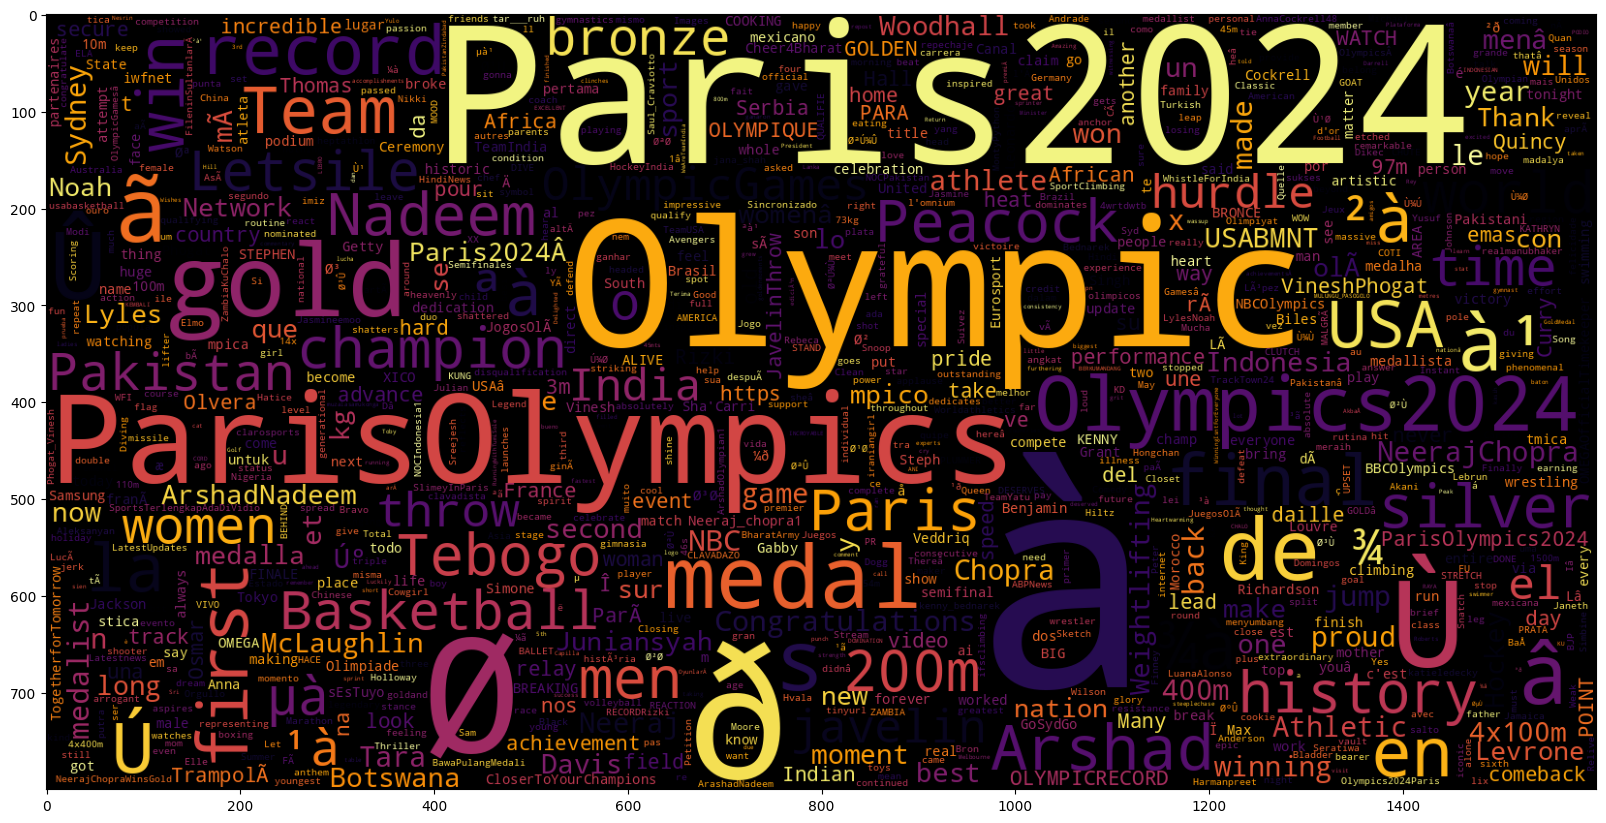

In [278]:
# ! pip install WordCloud
processedtext = df['Tweet_Content'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False,colormap='inferno').generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

This word Cloud Shows Instances of Corrupted Text which seems to be a lot because the corrupted text are displayed more prominently

#### A sample of a row with corrupted text

Some tweets seem corrupted, containing unusual or incorrect words, indicating potential data quality issues that need to be addressed for accurate analysis.

In [279]:
# A sample of a row with corrupted text
df['Tweet_Content'].iloc[13000]

'19 Ø³Ø§Ù\x84Û\x81 Ø§Û\x8cØ±Ø§Ù\x86Û\x8c Ù\x84Ú\x91Ú©Û\x8c Ø§Û\x8cØªÚ¾Ù\x84Û\x8cÙ¹ 400 Ù\x85Û\x8cÙ¹Ø± Ø¯Ù\x88Ú\x91 Ù\x85Û\x8cÚº Ø¨Ø§Ø\xadØ¬Ø§Ø¨ Û\x81Ù\x88Ú©Ø± Ø¨ØºÛ\x8cØ± Ú©Ø³Û\x8c Ú¯Ø§Ø¦Û\x8cÚ\x88 Ú©Û\x92 Ú¯Ù\x88Ù\x84Ú\x88 Ù\x85Û\x8cÚ\x88Ù\x84 Ø§Ù¾Ù\x86Û\x92 Ù\x86Ø§Ù\x85 Ú©Ø±Ú©Û\x92 Ø¯Ù\x86Û\x8cØ§ Ø¨Ú¾Ø± Ú©Û\x8c Ø®Ù\x88Ø§ØªÛ\x8cÙ\x86 Ú©Û\x92 Ù\x84Û\x8cÛ\x92 Ù\x85Ø«Ø§Ù\x84 Ø¨Ù\x86 Ú¯Ø¦Û\x8cÚº . Ù\x85Ø¨Û\x8cÙ\x86Ø§ Ù\x86Ø¹Ù\x85Øª Ø²Ø§Ø¯Û\x81 Ù\x86Û\x92 ØªØ§Ø¦Ú©Ù\x88Ø§Ù\x86Ú\x88Ù\x88 Ù\x85Û\x8cÚº Ø¨Ø±Ø§Ù\x86Ø² Ù\x85Û\x8cÚ\x88Ù\x84 Ø¬Û\x8cØªÙ\x86Û\x92 Ú©Û\x92 Ø¨Ø¹Ø¯ Ø§Ø³ Ù\x85Û\x8cÚ\x88Ù\x84  Ú©Ù\x88 Ø§Ù\x85Ø§Ù\x85 Ø²Ù\x85Ø§Ù\x86 Ø¹Ù\x84Û\x8cÛ\x81 Ø§Ù\x84Ø³Ù\x84Ø§Ù\x85 Ú©Û\x92 Ù\x86Ø§Ù\x85 Ú©Ø±Ø¯Û\x8cØ§Û\x94#olympics2024 #iraniangirl'

**A function to remove corrupted Texts**

Corrupted texts can introduce inconsistencies in the data, which may negatively impact the accuracy and reliability of the model. Therefore, it's essential to remove these corrupted texts to ensure the quality of the data before proceeding with modeling

In [280]:
def remove_corrupted_text(text):
    """
    Cleans the input text by:
    - Removing non-ASCII characters
    - Removing sequences of repeated characters
    - Removing special symbols and corrupted characters
    - Keeping only English alphabet, digits, and some punctuation
    """
    if not isinstance(text, str):
        return ''

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove repeated characters (e.g., "û û" becomes " ")
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Remove special symbols or corrupted characters
    text = re.sub(r'[^\w\s,.!?\'"-]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text





### Text Cleaning

**A function for Text Cleaning**

Our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-
- Remove URLs
- Remove mentions
- Remove hashtags (keep the text after the #)
- Remove punctuation
- Tokenization
- Remove stopwords and Lemmatization
- Remove extra white spaces
- Remove numbers
- Filter tokens to retain only nouns, adjectives, verbs, and adverbs

In [281]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english') + ['ø³','ø', 'ù'])
lemmatizer = WordNetLemmatizer()



def replace_emojis(text):
    """
    Converts emojis in the text to their corresponding word descriptions.
    """
    return emoji.demojize(text, delimiters=(" ", " "))

def lemmatize_tweet(text):
    # Remove corrupted text
    text = remove_corrupted_text(text)

    # Convert emojis to words
    text = replace_emojis(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keep the text after the #)
    text = re.sub(r'#', '', text)
    # Remove special characters like "&quot;"
    text = re.sub(r'&\w+;', '', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = re.split('\W+', text.lower())
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra white spaces
    tokens = [word.strip() for word in tokens if word.strip() != '']
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Tag parts of speech
    pos_tags = nltk.pos_tag(tokens)
    # Filter tokens to retain only nouns, adjectives, verbs, and adverbs
    important_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'RB', 'RBR', 'RBS'}
    tokens = [word for word, tag in pos_tags if tag in important_pos]

    return tokens

def join_text(tokens):
    """
    This function takes a list of tokens (words) and returns them as a single string.
    Each token is separated by a space.
    """
    return " ".join(tokens)




In [282]:
# Apply the preprocessing function to the entire Tweet_Content column
df['clean_tweet'] = df['Tweet_Content'].apply(lambda x: join_text(lemmatize_tweet(x)))




In [283]:
#Check if the corrupted words are still there in row 1000
df['clean_tweet'].iloc[13000]

'olympics2024 iraniangirl'

In [284]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17252 entries, 0 to 52691
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Category                  17252 non-null  object        
 1   Keyword                   17252 non-null  object        
 2   Tweet_Timestamp           17252 non-null  datetime64[ns]
 3   Tweet_Content             17252 non-null  object        
 4   Tweet_Number_of_Reviews   17252 non-null  object        
 5   Tweet_Number_of_Retweets  17252 non-null  float64       
 6   Tweet_Number_of_Likes     17252 non-null  float64       
 7   Tweet_Number_of_Looks     17252 non-null  float64       
 8   clean_tweet               17252 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.3+ MB


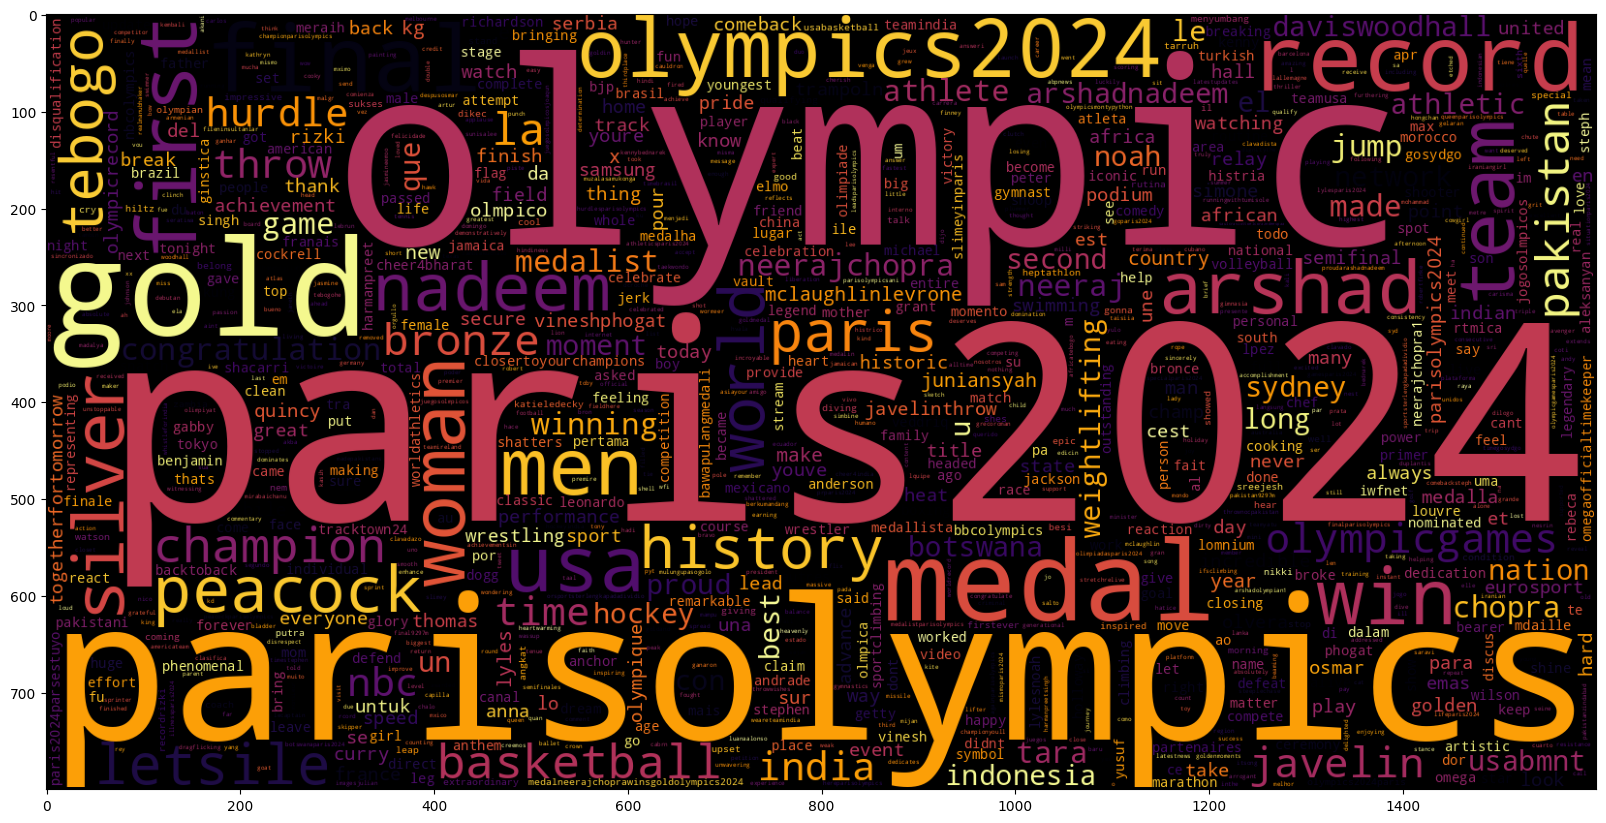

In [285]:
processedtext = df['clean_tweet'].tolist()

# Use all processed text (up to the length of your dataset)
data_neg = processedtext[:len(processedtext)]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False, colormap='inferno').generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17252 entries, 0 to 52691
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Category                  17252 non-null  object        
 1   Keyword                   17252 non-null  object        
 2   Tweet_Timestamp           17252 non-null  datetime64[ns]
 3   Tweet_Content             17252 non-null  object        
 4   Tweet_Number_of_Reviews   17252 non-null  object        
 5   Tweet_Number_of_Retweets  17252 non-null  float64       
 6   Tweet_Number_of_Likes     17252 non-null  float64       
 7   Tweet_Number_of_Looks     17252 non-null  float64       
 8   clean_tweet               17252 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.3+ MB


In [287]:
# Save the DataFrame to a new CSV file


df.to_csv('cleaned-sentiments.csv', index=False)


In [288]:
# Load the clean dataset to see if its actually clean
df = pd.read_csv('cleaned-sentiments.csv')
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17234 entries, 0 to 17251
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Category                  17234 non-null  object 
 1   Keyword                   17234 non-null  object 
 2   Tweet_Timestamp           17234 non-null  object 
 3   Tweet_Content             17234 non-null  object 
 4   Tweet_Number_of_Reviews   17234 non-null  object 
 5   Tweet_Number_of_Retweets  17234 non-null  float64
 6   Tweet_Number_of_Likes     17234 non-null  float64
 7   Tweet_Number_of_Looks     17234 non-null  float64
 8   clean_tweet               17234 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.3+ MB


# Exploratory Data Analysis


## Temporal Distribution and Pattern Identification of Tweet Frequency

In [289]:
## Initialize the analyzer and perform the analysis of tweet data related to the Olympics,
class OlympicTweetAnalyzer:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
        self.df['Tweet_Timestamp'] = pd.to_datetime(self.df['Tweet_Timestamp'])
        self.processedtext = self.df['clean_tweet'].astype(str).tolist()  # Convert to string

    def analyze_distribution(self):
        daily_counts = self.df.groupby(self.df['Tweet_Timestamp'].dt.date).size()
        return daily_counts

    def identify_patterns(self):
        hourly_counts = self.df.groupby([self.df['Tweet_Timestamp'].dt.date,
                                         self.df['Tweet_Timestamp'].dt.hour]).size().unstack(fill_value=0)
        return hourly_counts

    def plot_distribution(self, daily_counts):
        plt.figure(figsize=(16, 8))
        daily_counts.plot(kind='bar')
        plt.title('Distribution of Tweets Over Time', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Number of Tweets', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def plot_heatmap(self, hourly_counts):
        plt.figure(figsize=(16, 10))
        sns.heatmap(hourly_counts, cmap='YlOrRd')
        plt.title('Heatmap of Tweet Frequency by Date and Hour', fontsize=16)
        plt.xlabel('Hour of Day', fontsize=12)
        plt.ylabel('Date', fontsize=12)
        plt.tight_layout()
        plt.show()

    def identify_spikes(self, daily_counts, threshold=1.5):
        mean_tweets = daily_counts.mean()
        std_tweets = daily_counts.std()
        spikes = daily_counts[daily_counts > (mean_tweets + threshold * std_tweets)]
        return spikes

    def analyze_and_plot(self):
        daily_counts = self.analyze_distribution()
        hourly_counts = self.identify_patterns()
        spikes = self.identify_spikes(daily_counts)

        print("Overall tweet distribution:")
        print(daily_counts)

        print("\nDays with significant spikes in tweet activity:")
        print(spikes)

        return daily_counts, hourly_counts, spikes


In [290]:
 ## Initialize the analyzer and perform the analysis
analyzer = OlympicTweetAnalyzer('cleaned-sentiments.csv')
daily_counts, hourly_counts, spikes = analyzer.analyze_and_plot()


Overall tweet distribution:
Tweet_Timestamp
2024-01-01        1
2024-01-05       11
2024-01-11        1
2024-01-13        3
2024-01-15        1
              ...  
2024-08-05      129
2024-08-06      400
2024-08-07     1973
2024-08-08    11799
2024-08-09     1972
Length: 130, dtype: int64

Days with significant spikes in tweet activity:
Tweet_Timestamp
2024-08-07     1973
2024-08-08    11799
2024-08-09     1972
dtype: int64


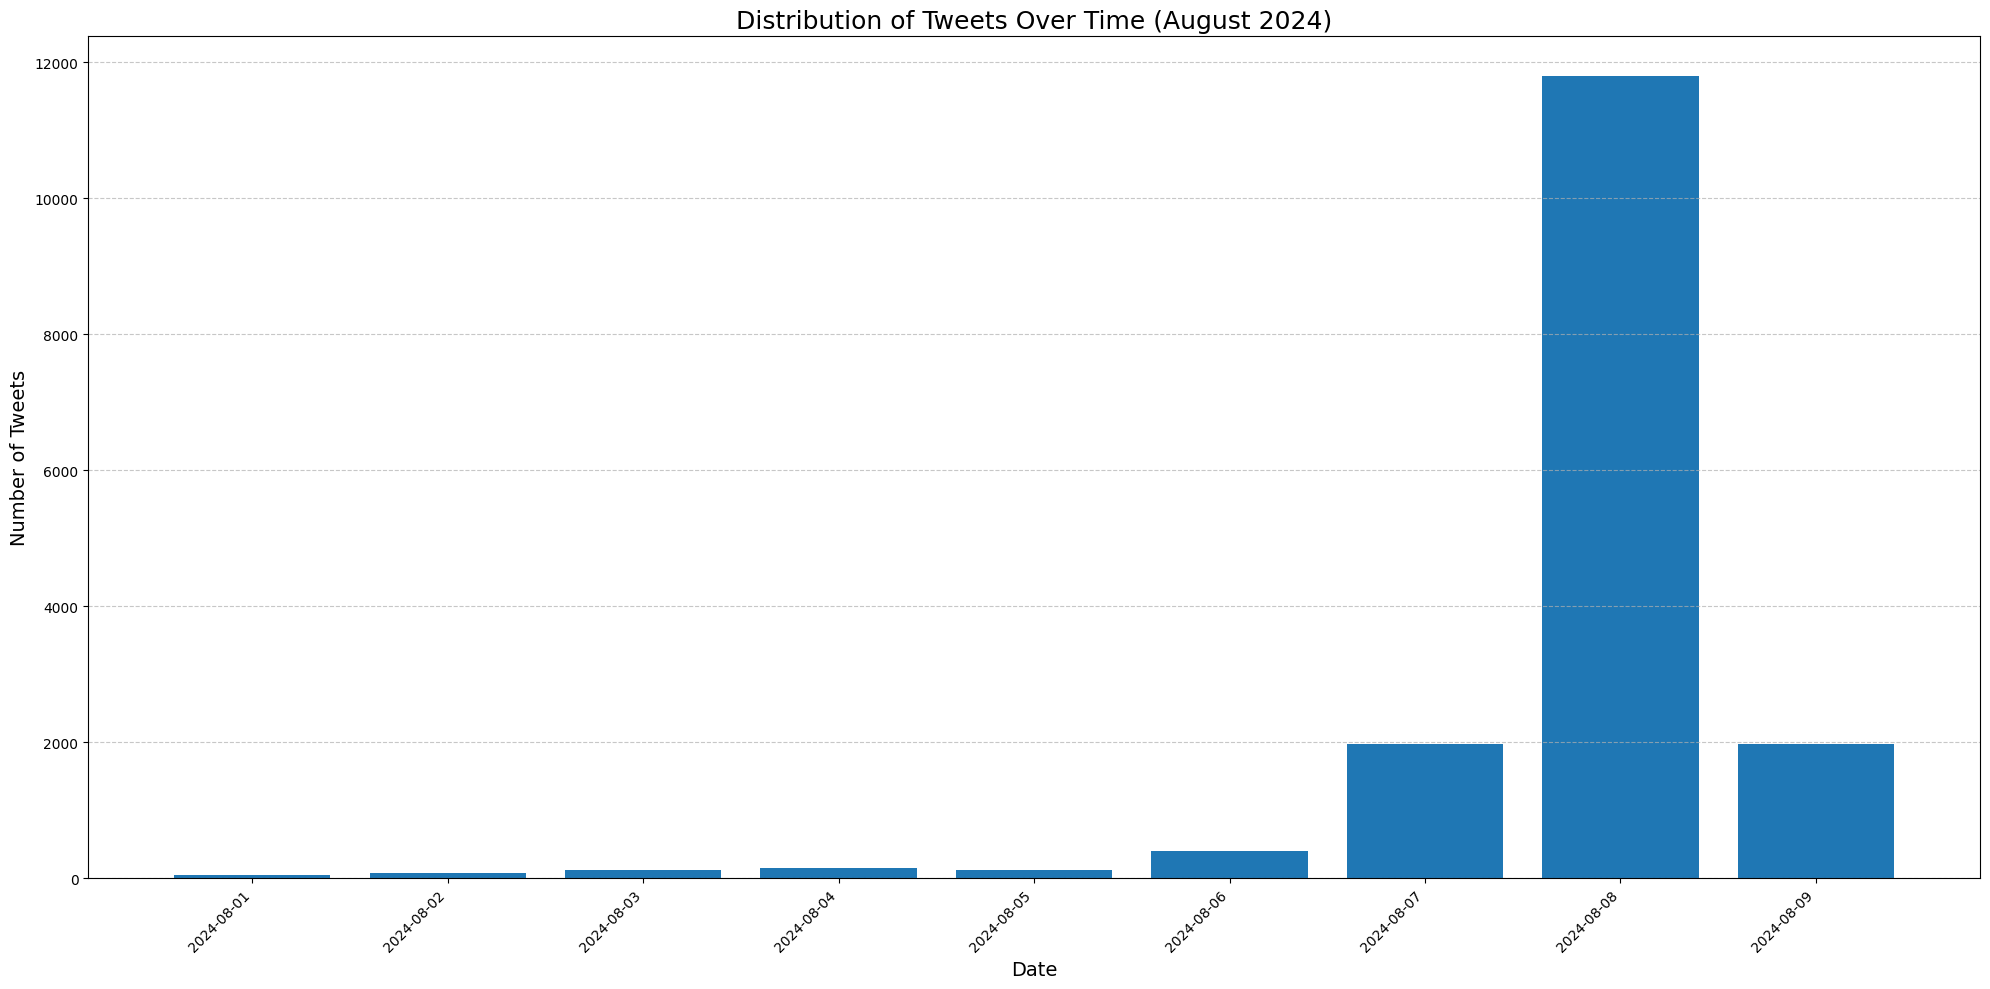

In [291]:
#Group the dataframe by date and plot the distribution of tweets over time
def plot_distribution(df):

    # Convert 'Tweet_Timestamp' to datetime if it's not already
    df['Tweet_Timestamp'] = pd.to_datetime(df['Tweet_Timestamp'])  # Convert to datetime

    # Filter the data for August 2024
    df_august = df[df['Tweet_Timestamp'].dt.month == 8]

    # Group by date and count tweets for August 2024
    daily_counts = df_august.groupby(df_august['Tweet_Timestamp'].dt.date).size()

    plt.figure(figsize=(20, 10))

    # Use matplotlib bar plot with blue color
    plt.bar(daily_counts.index, daily_counts.values, color='#1f77b4')  # Blue color

    plt.title('Distribution of Tweets Over Time (August 2024)', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Tweets', fontsize=14)

    # Format x-axis
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45, ha='right')

    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot the distribution
plot_distribution(df)

* The bar chart reveals a significant spike in tweet activity on August 8th, 2024, indicating an intense burst of Twitter activity likely related to the 2024 Olympics. This surge in tweets may coincide with a major event or announcement that took place on that day.

Analyzing engagement distributions...


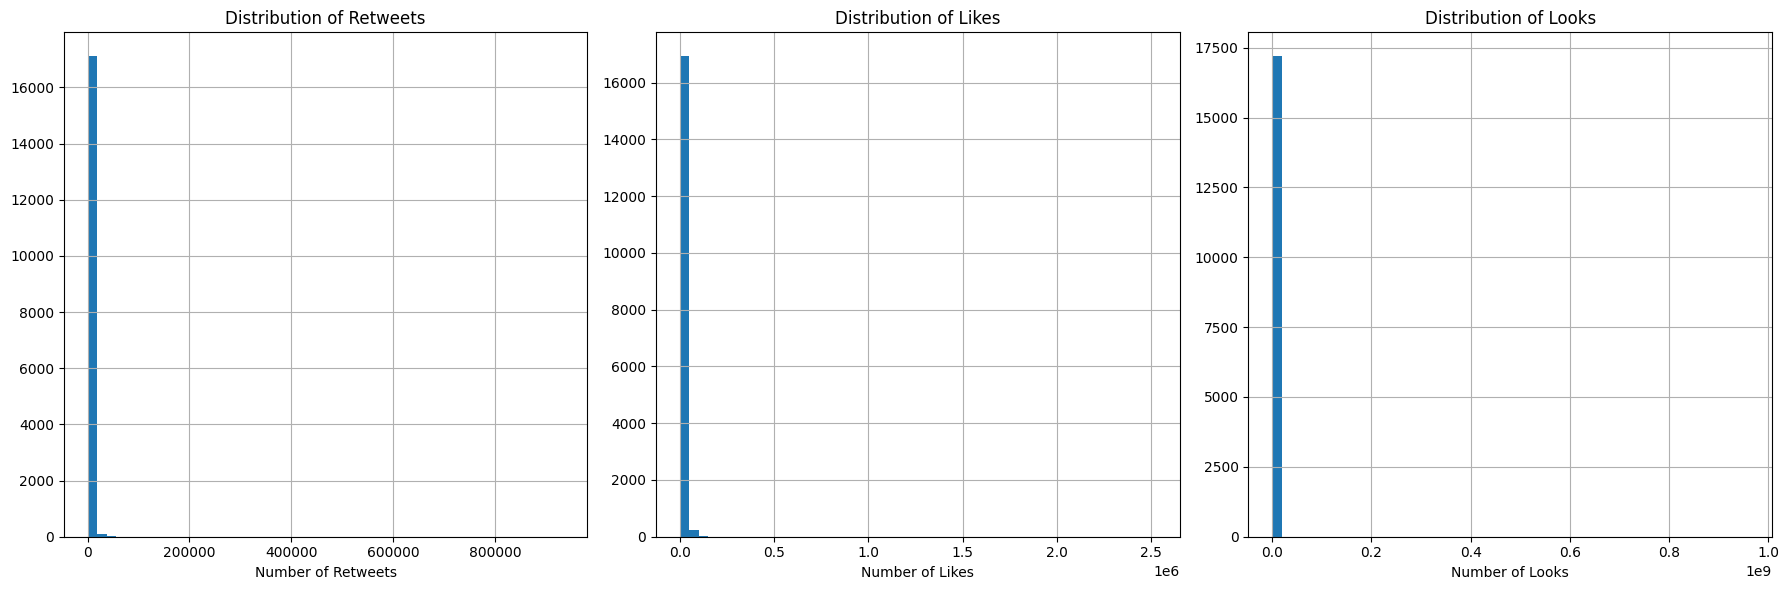


Identifying top tweets...

Top 10 tweets by Tweet_Number_of_Retweets:
                                           Tweet_Content  \
10800  OLYMPIC RECORDIndonesia's Rizki Juniansyah set...   
1929   KATHRYN PLUMMER WINS IT. The United States is ...   
9930   #GOLD AND AN #OLYMPICRECORD! Arshad Nadeem shi...   
9273   TARA DAVIS-WOODHALL IS AN OLYMPIC CHAMPION! #P...   
8102   16-year-old Quincy Wilson is now the youngest ...   
8229   Â¡LAS LEONAAAS! Â¡OTRA VEZ MEDALLISTAS OLÃMPI...   
15770  Gave it their all. Hvala, Serbia  #Paris2024 x...   
11596  Lucia Yepez sin tanta pantalla logrÃ³ ser meda...   
9327   Letsile Tebogo, he did it for his mom, for his...   
10840  Netinho recebendo sua medalha de bronze no tae...   

       Tweet_Number_of_Retweets  
10800                  934944.0  
1929                   916917.0  
9930                   898904.0  
9273                   821824.0  
8102                   785786.0  
8229                   751755.0  
15770                  683684.

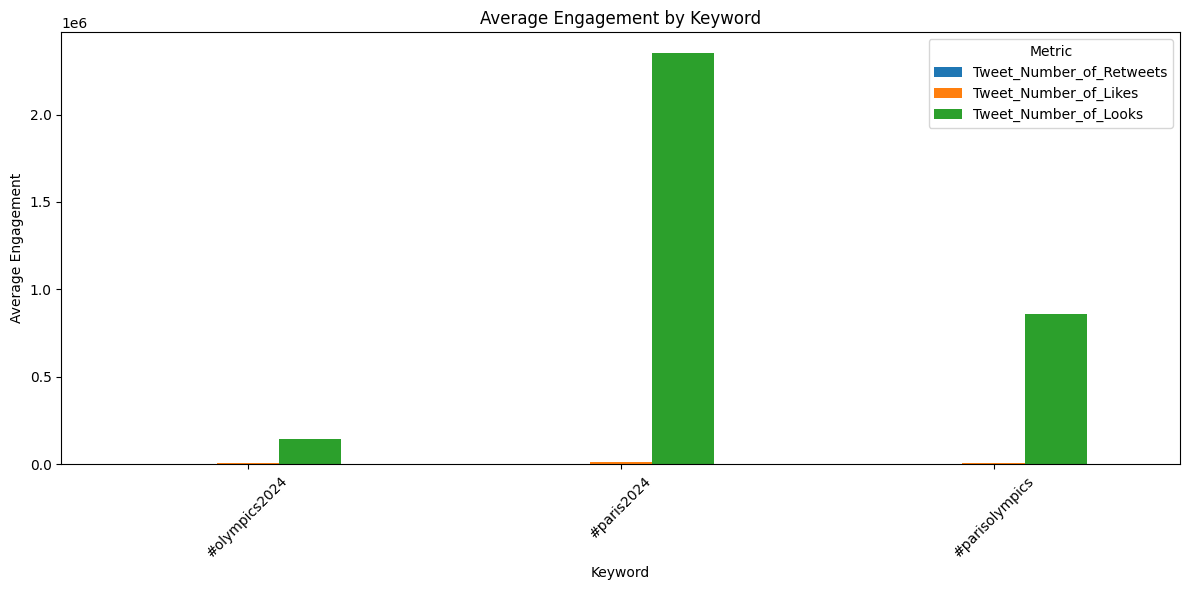

In [292]:
## Analyze and visualize tweet content with OlympicsTweetAnalyze
class OlympicKeywordAnalyzer:
    def __init__(self, df, n_keywords=10):
        self.df = df
        self.keyword_freq = None
        self.keyword_impact = None
        self.keyword_engagement = None
        self.n_keywords = n_keywords
        self.keywords = []

    def extract_keywords(self):
        # Directly use the 'clean_tweet' column for keyword extraction
        all_words = ' '.join(self.df['clean_tweet'].astype(str).tolist()).split()
        common_words = Counter(all_words).most_common(self.n_keywords)
        self.keywords = [word for word, _ in common_words]


    def analyze_engagement_distribution(self):
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        self.df['Tweet_Number_of_Retweets'].hist(ax=axes[0], bins=50)
        axes[0].set_title('Distribution of Retweets')
        axes[0].set_xlabel('Number of Retweets')

        self.df['Tweet_Number_of_Likes'].hist(ax=axes[1], bins=50)
        axes[1].set_title('Distribution of Likes')
        axes[1].set_xlabel('Number of Likes')

        self.df['Tweet_Number_of_Looks'].hist(ax=axes[2], bins=50)
        axes[2].set_title('Distribution of Looks')
        axes[2].set_xlabel('Number of Looks')

        plt.tight_layout()
        plt.show()

    def identify_top_tweets(self, n=10):
        metrics = ['Tweet_Number_of_Retweets', 'Tweet_Number_of_Likes', 'Tweet_Number_of_Looks']
        top_tweets = {}

        for metric in metrics:
            top_tweets[metric] = self.df.nlargest(n, metric)[['Tweet_Content', metric]]

        return top_tweets

    def calculate_average_engagement(self):
        return {
            'Avg Retweets': self.df['Tweet_Number_of_Retweets'].mean(),
            'Avg Likes': self.df['Tweet_Number_of_Likes'].mean(),
            'Avg Looks': self.df['Tweet_Number_of_Looks'].mean()
        }

    def compare_engagement_by_keyword(self):
        engagement_by_keyword = self.df.groupby('Keyword').agg({
            'Tweet_Number_of_Retweets': 'mean',
            'Tweet_Number_of_Likes': 'mean',
            'Tweet_Number_of_Looks': 'mean'
        })

        engagement_by_keyword.plot(kind='bar', figsize=(12, 6))
        plt.title('Average Engagement by Keyword')
        plt.xlabel('Keyword')
        plt.ylabel('Average Engagement')
        plt.legend(title='Metric')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

    def run_analysis(self):
        print("Analyzing engagement distributions...")
        self.analyze_engagement_distribution()

        print("\nIdentifying top tweets...")
        top_tweets = self.identify_top_tweets()
        for metric, tweets in top_tweets.items():
            print(f"\nTop 10 tweets by {metric}:")
            print(tweets)

        print("\nCalculating average engagement rates...")
        avg_engagement = self.calculate_average_engagement()
        for metric, value in avg_engagement.items():
            print(f"{metric}: {value:.2f}")

        print("\nComparing engagement across keywords...")
        self.compare_engagement_by_keyword()

# Initialize and plot the engagement analysis
keyword_analyzer = OlympicKeywordAnalyzer(df)  # Create an instance of OlympicKeywordAnalyzer
keyword_analyzer.run_analysis()



### Distribution of Retweets:

* There's a sharp decline in frequency as the number of retweets increases.

### Distribution of Likes:

* The distribution is heavily skewed towards lower numbers of likes

### Distribution of Looks

* The distribution of looks is more spread out compared to retweets and likes

### Average Engagement by Keyword

* Three keywords are compared: #olympics2024, #paris2024, and #parisolympics.

* The hashtag #paris2024 shows moderate engagement across all metrics compared to the other keywords.

* For #paris2024:

* Retweets are the highest form of engagement, with an average of nearly 1000.
* Likes are the second most common, averaging around 750.
* Looks are the least common, at about 400 on average.

* Compared to #olympics2024, #paris2024 generates significantly more engagement across all metrics, suggesting it may be the more popular or official hashtag for the event.

* The hashtag #pariscolympics shows the highest overall engagement.However, it has the lowest number of looks among the three hashtags.

* #olympics2024 has the lowest engagement overall, but maintains a more balanced distribution between likes and looks compared to the other hashtags.





##  frequency and impact of Olympic-specific keywords

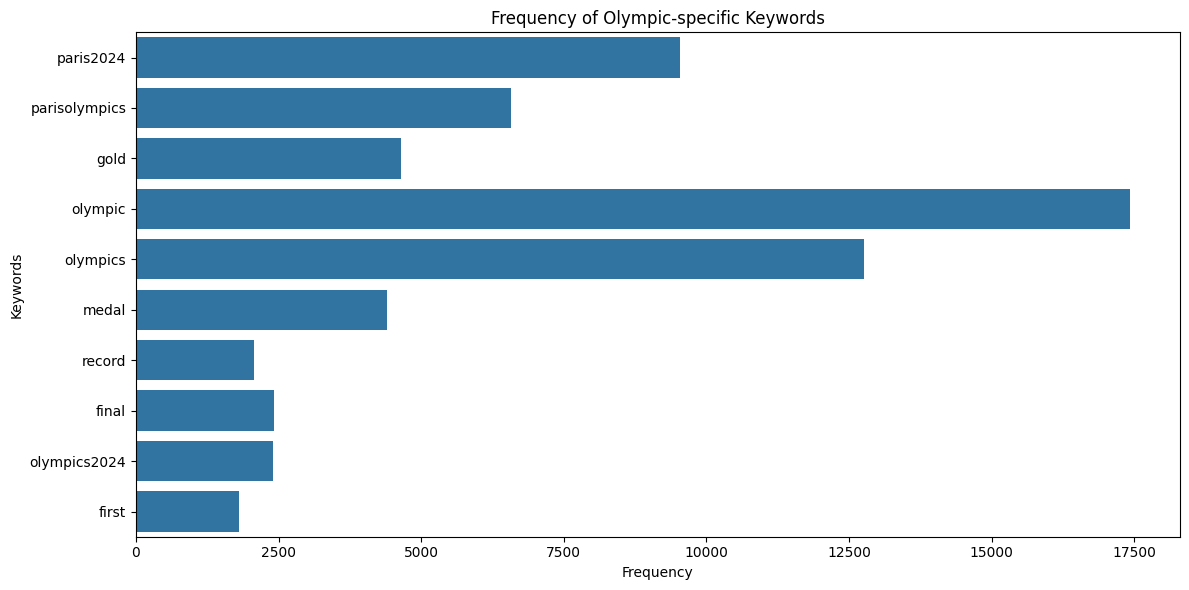

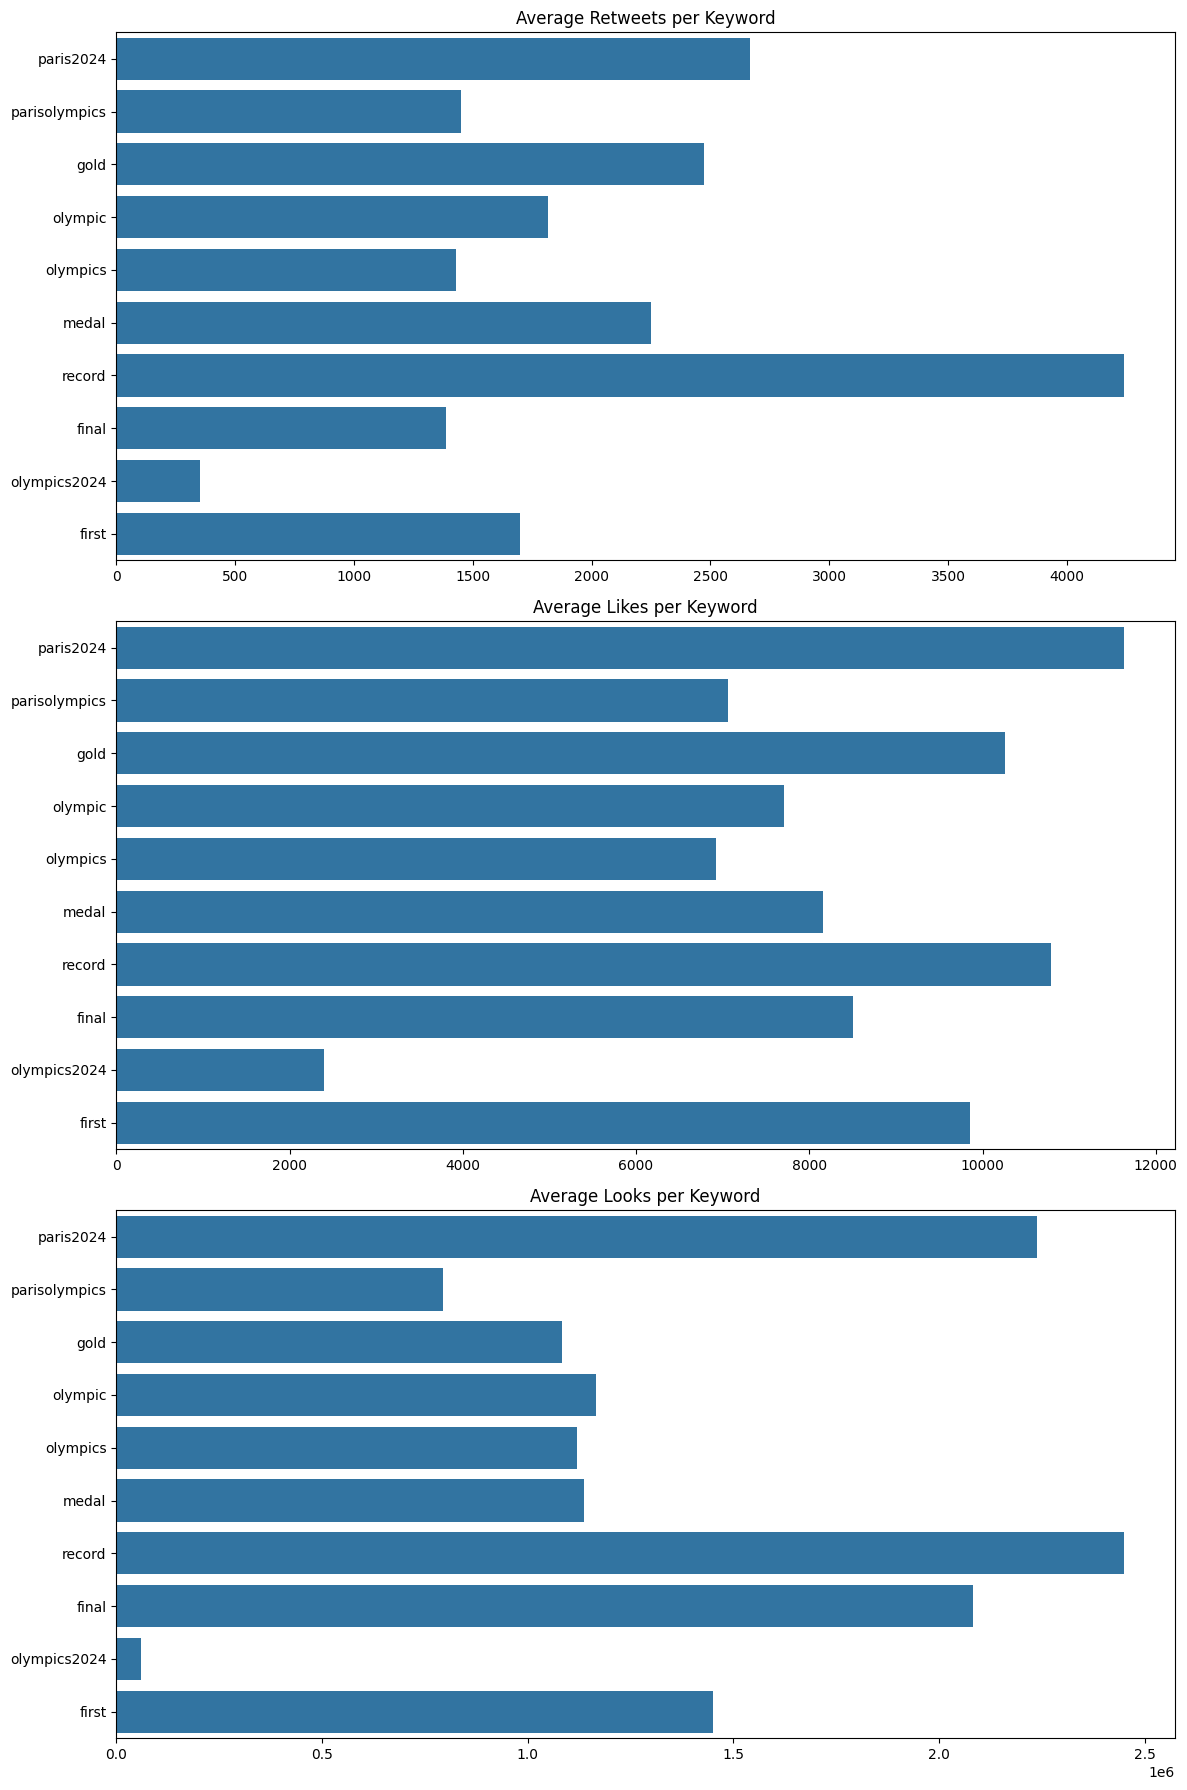

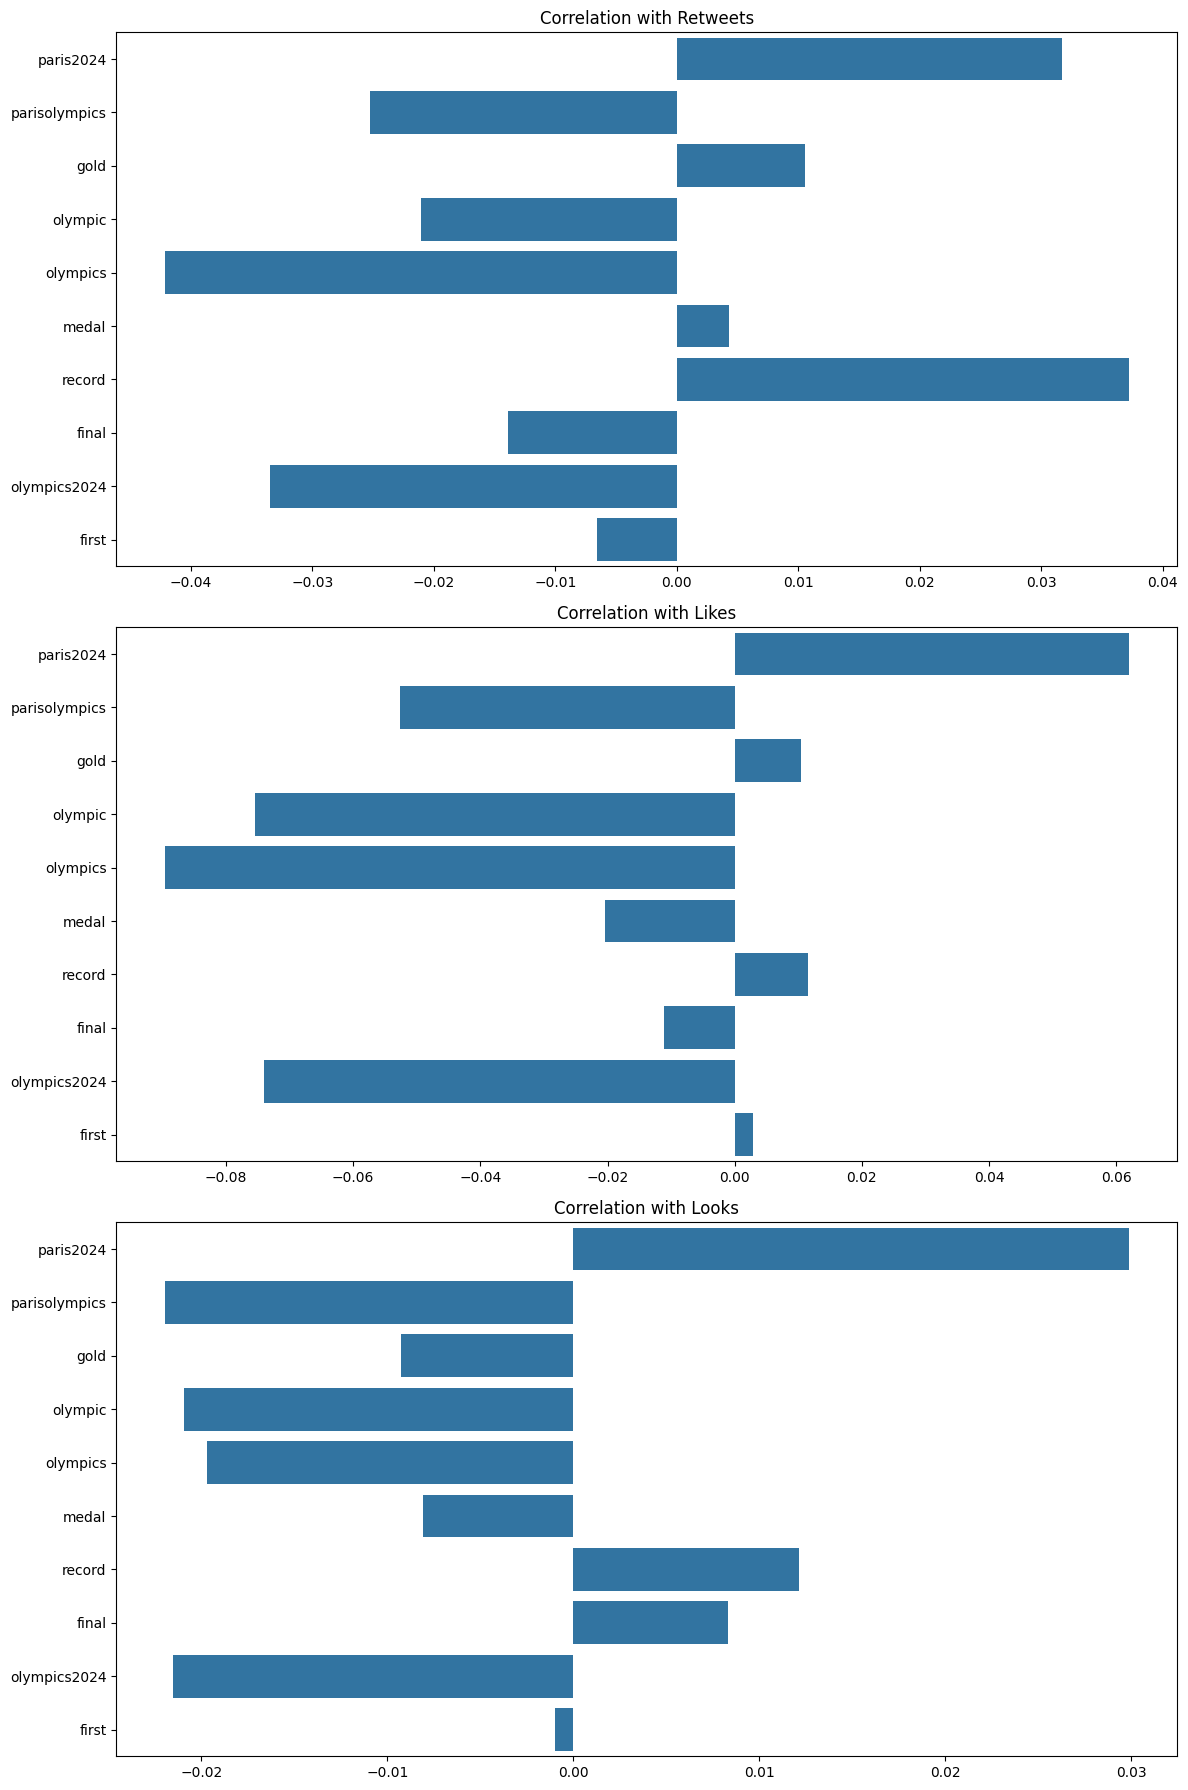

In [293]:
## Analyze and visualize tweet content with OlympicsTweetAnalyze
class OlympicKeywordAnalyzer:
    def __init__(self, df, n_keywords=10):
        self.df = df
        self.keyword_freq = None
        self.keyword_impact = None
        self.keyword_engagement = None
        self.n_keywords = n_keywords
        self.keywords = []



    def extract_keywords(self):
        # Handle potential non-string values in 'clean_tweet'
        all_words = ' '.join(self.df['clean_tweet'].astype(str).tolist()).split()
        common_words = Counter(all_words).most_common(self.n_keywords)
        self.keywords = [word for word, _ in common_words]

    def analyze_keyword_frequency(self):
      self.keyword_freq = {}
      for keyword in self.keywords:
        self.keyword_freq[keyword] = self.df['clean_tweet'].str.count(keyword).sum()

    def analyze_keyword_impact(self):
        self.keyword_impact = {}
        for keyword in self.keywords:
            # Handle NaN values in 'clean_tweet'
            tweets_with_keyword = self.df[self.df['clean_tweet'].str.contains(keyword, na=False)]  # Ignore NaN values
            avg_retweets = tweets_with_keyword['Tweet_Number_of_Retweets'].mean()
            avg_likes = tweets_with_keyword['Tweet_Number_of_Likes'].mean()
            avg_looks = tweets_with_keyword['Tweet_Number_of_Looks'].mean()
            self.keyword_impact[keyword] = {
                'avg_retweets': avg_retweets,
                'avg_likes': avg_likes,
                'avg_looks': avg_looks
            }

    def analyze_keyword_engagement_correlation(self):
        self.keyword_engagement = {}
        for keyword in self.keywords:
            # Handle NaN values by filling them with False before converting to integers
            self.df[f'contains_{keyword}'] = self.df['clean_tweet'].str.contains(keyword, na=False).fillna(False).astype(int)
            corr_retweets = self.df[f'contains_{keyword}'].corr(self.df['Tweet_Number_of_Retweets'])
            corr_likes = self.df[f'contains_{keyword}'].corr(self.df['Tweet_Number_of_Likes'])
            corr_looks = self.df[f'contains_{keyword}'].corr(self.df['Tweet_Number_of_Looks'])
            self.keyword_engagement[keyword] = {
                'corr_retweets': corr_retweets,
                'corr_likes': corr_likes,
                'corr_looks': corr_looks
            }
            self.df.drop(f'contains_{keyword}', axis=1, inplace=True)

    def plot_keyword_frequency(self):
        if not self.keyword_freq:
            print("No keyword frequency data to plot.")
            return

        plt.figure(figsize=(12, 6))
        sns.barplot(y=list(self.keyword_freq.keys()), x=list(self.keyword_freq.values()), color='#1f77b4')
        plt.title('Frequency of Olympic-specific Keywords')
        plt.xlabel('Frequency')
        plt.ylabel('Keywords')
        plt.tight_layout()
        plt.show()

    def plot_keyword_impact(self):
        if not self.keyword_impact:
            print("No keyword impact data to plot.")
            return

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

        keywords = list(self.keyword_impact.keys())
        avg_retweets = [self.keyword_impact[k]['avg_retweets'] for k in keywords]
        avg_likes = [self.keyword_impact[k]['avg_likes'] for k in keywords]
        avg_looks = [self.keyword_impact[k]['avg_looks'] for k in keywords]

        sns.barplot(y=keywords, x=avg_retweets, ax=ax1, color='#1f77b4')
        ax1.set_title('Average Retweets per Keyword')
        ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=avg_likes, ax=ax2, color='#1f77b4')
        ax2.set_title('Average Likes per Keyword')
        ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=avg_looks, ax=ax3, color='#1f77b4')
        ax3.set_title('Average Looks per Keyword')
        ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, ha='right')

        plt.tight_layout()
        plt.show()

    def plot_keyword_engagement_correlation(self):
        if not self.keyword_engagement:
            print("No keyword engagement correlation data to plot.")
            return

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

        keywords = list(self.keyword_engagement.keys())
        corr_retweets = [self.keyword_engagement[k]['corr_retweets'] for k in keywords]
        corr_likes = [self.keyword_engagement[k]['corr_likes'] for k in keywords]
        corr_looks = [self.keyword_engagement[k]['corr_looks'] for k in keywords]

        sns.barplot(y=keywords, x=corr_retweets, ax=ax1, color='#1f77b4')
        ax1.set_title('Correlation with Retweets')
        ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=corr_likes, ax=ax2, color='#1f77b4')
        ax2.set_title('Correlation with Likes')
        ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha='right')

        sns.barplot(y=keywords, x=corr_looks, ax=ax3, color='#1f77b4')
        ax3.set_title('Correlation with Looks')
        ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, ha='right')

        plt.tight_layout()
        plt.show()

# Initialize keyword analyzer
df = pd.read_csv('cleaned-sentiments.csv')

analyzer = OlympicKeywordAnalyzer(df)
# analyzer.preprocess()
# analyzer.convert_to_numeric()  # Convert engagement columns to numeric values
analyzer.extract_keywords()  # Automatically determine the top keywords
analyzer.analyze_keyword_frequency()
analyzer.analyze_keyword_impact()
analyzer.analyze_keyword_engagement_correlation()

analyzer.plot_keyword_frequency()
analyzer.plot_keyword_impact()
analyzer.plot_keyword_engagement_correlation()

## Observations

* The plots suggests that "paris2024" is a highly effective and popular hashtag for Olympic-related content.
* It drives strong engagement across all metrics, particularly in video views and likes.

In [294]:
# !pip install textblob

## Analysing Positive and Negative Sentiments

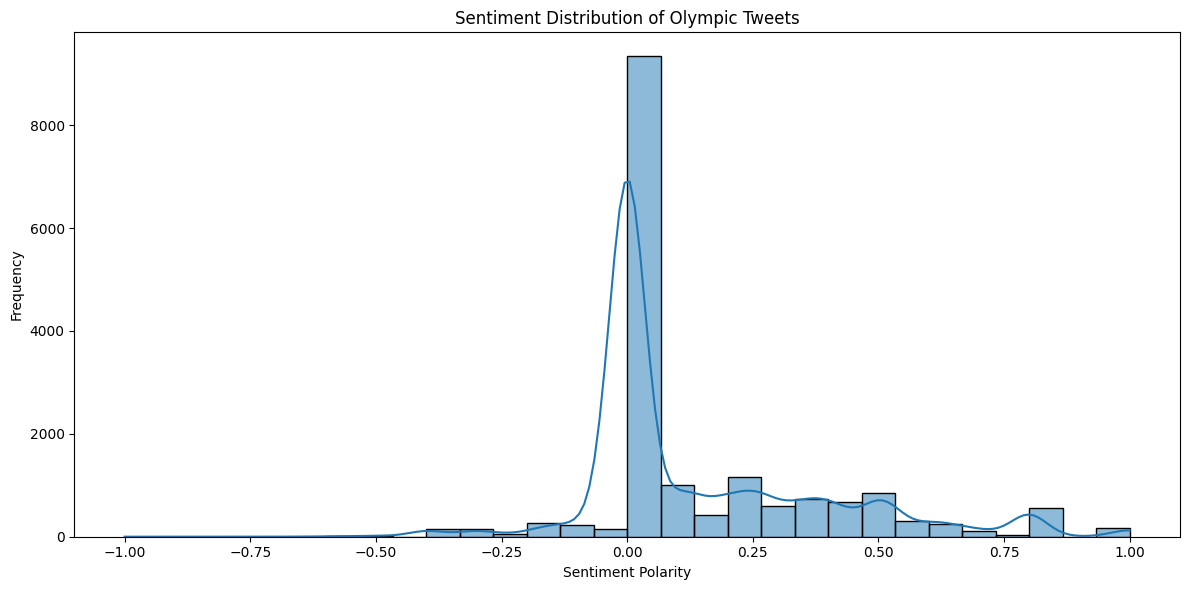

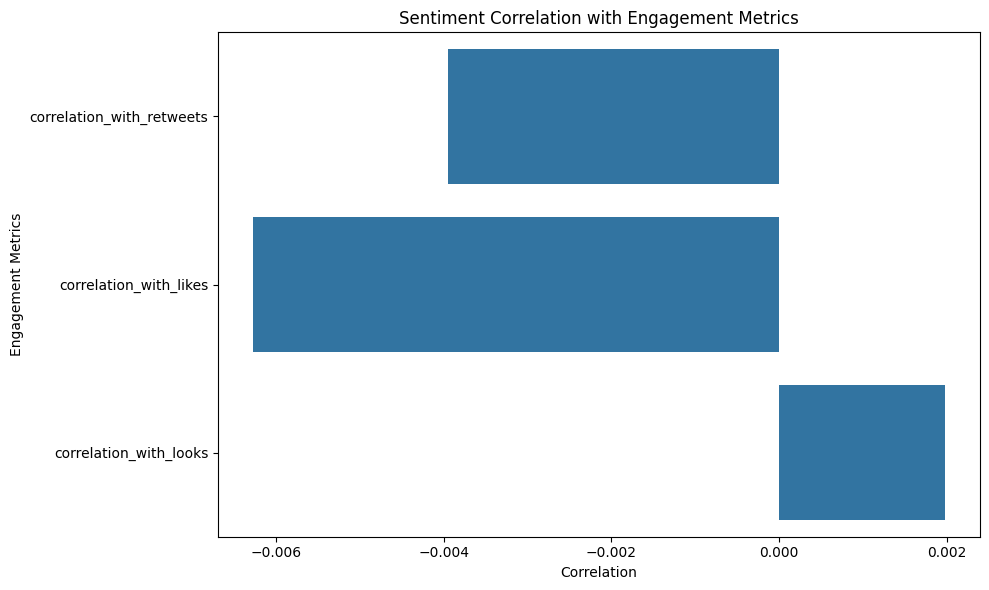

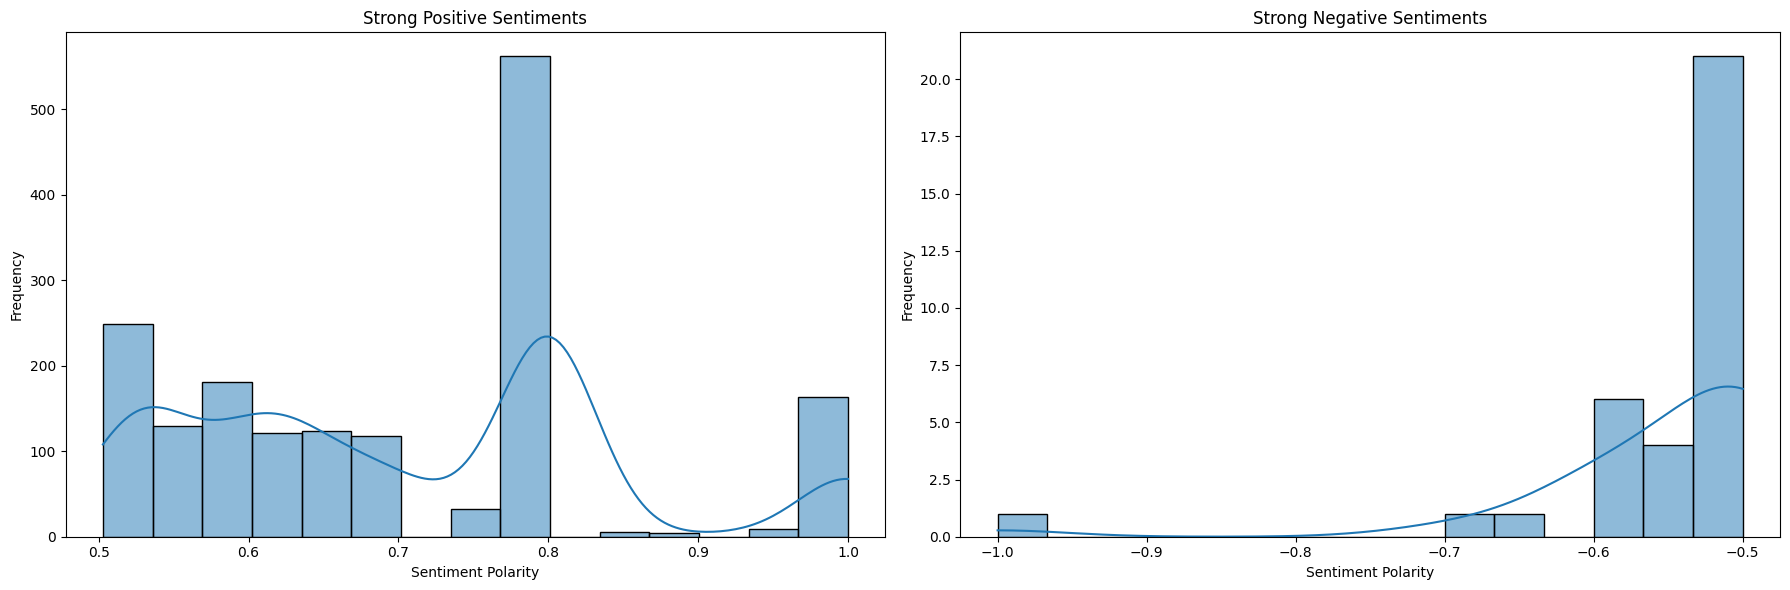

Positive Sentiment Tweets:

Negative Sentiment Tweets:


Category         Keyword Tweet_Timestamp  \
72    TopPost   #olympics2024      2024-08-07   
326   TopPost  #parisolympics      2024-08-08   
654   TopPost   #olympics2024      2024-08-07   
1012  TopPost  #parisolympics      2024-08-08   
1544  TopPost  #parisolympics      2024-08-08   

                                          Tweet_Content  \
72    MUST WATCH: KENNETH ROOKS IS CRAZY FOR THIS ON...   
326   Frederick Richard (@FrederickFlips) casually h...   
654   MUST WATCH: KENNETH ROOKS IS CRAZY FOR THIS ON...   
1012  Frederick Richard (@FrederickFlips) casually h...   
1544  Frederick Richard (@FrederickFlips) casually h...   

     Tweet_Number_of_Reviews  Tweet_Number_of_Retweets  Tweet_Number_of_Likes  \
72                        83                     572.0                 7900.0   
326                       29                     156.0                 1700.0   
654                       83                     573.0                 7900.0   
1012                      29                     158.0                 1700.0   
1544                      29                     161.0                 1800.0   

      Tweet_Number_of_Looks  \
72                1000000.0   
326                 78000.0   
654               1000000.0   
1012                80000.0   
1544                81000.0   

                                            clean_tweet  sentiment  
72    watch kenneth rook crazy oneabsolutely sent si...       -0.6  
326   frederick richard frederickflips casually hand...       -0.5  
654   watch kenneth rook crazy oneabsolutely sent si...       -0.6  
1012  frederick richard frederickflips casually hand...       -0.5  
1544  frederick richard frederickflips casually hand...       -0.5

In [295]:
## Analyze and visualize Olympic tweet sentiments and engagement correlations
from textblob import TextBlob
class OlympicSentimentAnalyzer:
    def __init__(self, df, n_keywords=10):
        self.df = df
        self.n_keywords = n_keywords
        self.keywords = []
        self.sentiment_summary = None
        self.sentiment_correlation = None
        self.strong_sentiments = None


    # Modify the perform_sentiment_analysis method as follows:
    def perform_sentiment_analysis(self):
        # Perform sentiment analysis using TextBlob, handling non-string values
        self.df['sentiment'] = self.df['clean_tweet'].astype(str).apply(lambda text: TextBlob(text).sentiment.polarity)



    def analyze_sentiment_correlation(self):
        # Analyze the correlation between sentiment and engagement metrics
        self.sentiment_correlation = {
            'correlation_with_retweets': self.df['sentiment'].corr(self.df['Tweet_Number_of_Retweets']),
            'correlation_with_likes': self.df['sentiment'].corr(self.df['Tweet_Number_of_Likes']),
            'correlation_with_looks': self.df['sentiment'].corr(self.df['Tweet_Number_of_Looks']),
        }

    def identify_strong_sentiments(self, threshold=0.5):
        # Identify tweets with strong positive or negative sentiment
        positive_tweets = self.df[self.df['sentiment'] > threshold]
        negative_tweets = self.df[self.df['sentiment'] < -threshold]
        self.strong_sentiments = {
            'positive': positive_tweets,
            'negative': negative_tweets
        }
        return positive_tweets, negative_tweets  # Return DataFrames for further use

    def plot_sentiment_distribution(self):
        plt.figure(figsize=(12, 6))
        sns.histplot(self.df['sentiment'], bins=30, kde=True)
        plt.title('Sentiment Distribution of Olympic Tweets')
        plt.xlabel('Sentiment Polarity')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def plot_sentiment_correlation(self):
        if not self.sentiment_correlation:
            print("No sentiment correlation data to plot.")
            return

        plt.figure(figsize=(10, 6))
        sns.barplot(y=list(self.sentiment_correlation.keys()), x=list(self.sentiment_correlation.values()))
        plt.title('Sentiment Correlation with Engagement Metrics')
        plt.xlabel('Correlation')
        plt.ylabel('Engagement Metrics')
        plt.tight_layout()
        plt.show()

    def plot_strong_sentiments(self):
        if not self.strong_sentiments:
            print("No strong sentiment data to plot.")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        sns.histplot(self.strong_sentiments['positive']['sentiment'], bins=15, kde=True, ax=ax1)
        ax1.set_title('Strong Positive Sentiments')
        ax1.set_xlabel('Sentiment Polarity')
        ax1.set_ylabel('Frequency')

        sns.histplot(self.strong_sentiments['negative']['sentiment'], bins=15, kde=True, ax=ax2)
        ax2.set_title('Strong Negative Sentiments')
        ax2.set_xlabel('Sentiment Polarity')
        ax2.set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

# Initialize sentiment analyzer
df = pd.read_csv('cleaned-sentiments.csv')

analyzer = OlympicSentimentAnalyzer(df)
# analyzer.preprocess()
# analyzer.convert_to_numeric()  # Convert engagement columns to numeric values
analyzer.perform_sentiment_analysis()
# analyzer.extract_keywords()
analyzer.analyze_sentiment_correlation()
positive_df, negative_df = analyzer.identify_strong_sentiments()

# Plot the results
analyzer.plot_sentiment_distribution()
analyzer.plot_sentiment_correlation()
analyzer.plot_strong_sentiments()

# Display the DataFrames for positive and negative sentiments
print("Positive Sentiment Tweets:")
positive_df.head()

print("\nNegative Sentiment Tweets:")
negative_df.head()

## Observations

* Discussions around the Paris 2024 Olympics are generally positive, with most tweets being neutral or slightly positive, and a small but notable presence of highly positive tweets. Negative sentiment is minimal.

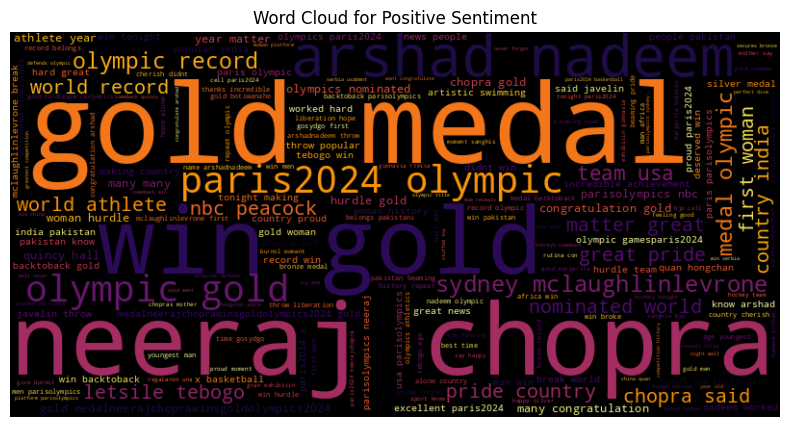

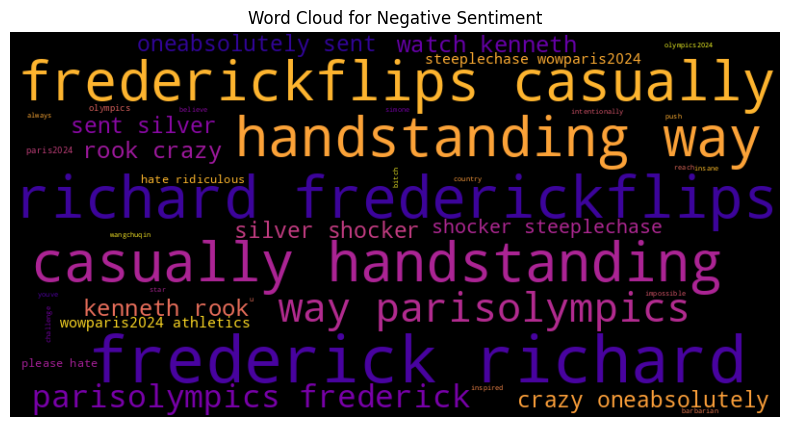

In [296]:
class OlympicSentimentAnalyzer:
    def __init__(self, df, n_keywords=10):
        self.df = df
        self.n_keywords = n_keywords
        self.strong_sentiments = None

    def clean_tweet_column(self):
        # Ensure all entries in 'clean_tweet' are strings
        self.df['clean_tweet'] = self.df['clean_tweet'].astype(str)
        # Replace 'nan' strings or empty strings with a placeholder or remove them
        self.df['clean_tweet'].replace('nan', '', inplace=True)

    def perform_sentiment_analysis(self):
        # Ensure the 'clean_tweet' column is clean before sentiment analysis
        self.clean_tweet_column()
        # Perform sentiment analysis using TextBlob
        self.df['sentiment'] = self.df['clean_tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)

    def identify_strong_sentiments(self, threshold=0.5):
        # Identify tweets with strong positive or negative sentiment
        if 'sentiment' not in self.df.columns:
            self.perform_sentiment_analysis()  # Calculate sentiment if not already done

        positive_tweets = self.df[self.df['sentiment'] > threshold]
        negative_tweets = self.df[self.df['sentiment'] < -threshold]
        self.strong_sentiments = {
            'positive': positive_tweets,
            'negative': negative_tweets
        }

    def plot_wordcloud(self, sentiment_type):
        if sentiment_type not in ['positive', 'negative']:
            raise ValueError("sentiment_type must be either 'positive' or 'negative'")

        text = ' '.join(self.strong_sentiments[sentiment_type]['clean_tweet'].tolist())

        colormap = 'inferno' if sentiment_type == 'positive' else 'plasma'

        wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=colormap).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {sentiment_type.capitalize()} Sentiment')
        plt.axis('off')
        plt.show()

# Load the DataFrame
df = pd.read_csv('cleaned-sentiments.csv')

# Initialize OlympicSentimentAnalyzer
analyzer = OlympicSentimentAnalyzer(df)

# Identify strong sentiments in the tweets
analyzer.identify_strong_sentiments()

# Generate word clouds for positive and negative sentiment tweets
analyzer.plot_wordcloud(sentiment_type='positive')  # Word cloud for positive sentiment tweets
analyzer.plot_wordcloud(sentiment_type='negative')  # Word cloud for negative sentiment tweets


## Observations

### Positive Sentiment Word Cloud:
* Terms like "olympic," "gold," "medal," "paris2024," "win," and "record,"  are prominently associated with positive sentiment.This indicates a strong focus on achievements, victories, and notable performances, particularly around the Paris 2024 Olympics.

### Negative Sentiment Word Cloud:

* the negative sentiment word cloud emphasizes words like "casually," "handstanding," "crazy," and "rook," suggesting that these terms are connected to negative or critical discussions.


## Most popular and engaging hashtags

In [299]:
class OlympicHashtagAnalyzer:
    def __init__(self, df):
        self.df = df
        self.hashtag_freq = None
        self.hashtag_impact = None
        self.hashtag_df = None

        # Ensure that 'Tweet_Content' column contains strings and handle NaN values
        self.df['clean_tweet'] = self.df['Tweet_Content'].astype(str).fillna('')

        # Extract hashtags from the 'Tweet_Content' column
        self.df['hashtags'] = self.df['clean_tweet'].apply(lambda x: [word for word in x.split() if word.startswith('#')])

    def analyze_hashtag_usage(self):
        # Flatten the list of hashtags and count the occurrences of each hashtag
        all_hashtags = [hashtag for hashtags in self.df['hashtags'] for hashtag in hashtags]
        self.hashtag_freq = pd.Series(all_hashtags).value_counts()

    def analyze_hashtag_impact(self):
        # Calculate average engagement metrics for each hashtag
        hashtag_data = []
        for index, row in self.df.iterrows():
            for hashtag in row['hashtags']:
                hashtag_data.append({
                    'hashtag': hashtag,
                    'retweets': row['Tweet_Number_of_Retweets'],
                    'likes': row['Tweet_Number_of_Likes'],
                    'looks': row['Tweet_Number_of_Looks']
                })

        hashtag_df = pd.DataFrame(hashtag_data)

        # Handle the case when no hashtags are found
        if hashtag_df.empty:
            print("Warning: No hashtags were extracted. Hashtag impact cannot be calculated.")
            self.hashtag_impact = pd.DataFrame()  # Assign an empty DataFrame
        else:
            if 'hashtag' in hashtag_df.columns:
                self.hashtag_impact = hashtag_df.groupby('hashtag').mean()
            else:
                print("Error: 'hashtag' column is missing in the DataFrame.")
                self.hashtag_impact = pd.DataFrame()  # Assign an empty DataFrame

    def create_hashtag_summary_df(self):
        # Create a DataFrame that summarizes hashtag usage and impact
        # Handle the case where hashtag_impact might be an empty DataFrame
        if self.hashtag_impact.empty:
            print("Warning: Hashtag impact is empty. Summary DataFrame will only contain frequency.")
            self.hashtag_df = pd.DataFrame({
                'frequency': self.hashtag_freq
            }).reset_index().rename(columns={'index': 'hashtag'}).sort_values(by='frequency', ascending=False)
        else:
            self.hashtag_df = pd.DataFrame({
                'frequency': self.hashtag_freq,
                'avg_retweets': self.hashtag_impact['retweets'],
                'avg_likes': self.hashtag_impact['likes'],
                'avg_looks': self.hashtag_impact['looks']
            }).reset_index().rename(columns={'index': 'hashtag'}).sort_values(by='frequency', ascending=False)
        return self.hashtag_df


analyzer = OlympicHashtagAnalyzer(df)
analyzer.analyze_hashtag_usage()
analyzer.analyze_hashtag_impact()
hashtag_summary_df = analyzer.create_hashtag_summary_df()

# Display the DataFrame summarizing the hashtag analysis
print("Hashtag Summary DataFrame:")
hashtag_summary_df.head(10)

Hashtag Summary DataFrame:


hashtag  frequency  avg_retweets     avg_likes     avg_looks
404      #Paris2024       7261   2553.602259  11062.015700  2.155970e+06
455  #ParisOlympics       4911   1537.229688   6187.510894  7.904600e+05
350       #Olympics       2055   1996.203406   9268.484185  2.342638e+06
355   #Olympics2024       1460    367.122603   2577.432877  6.185459e+04
47      #Basketball        780   3630.914103  18206.410256  4.246710e+06
334   #OlympicGames        653   1293.572741   7463.813170  1.240200e+06
300   #NeerajChopra        505    580.570297   8012.790099  1.168572e+05
616        #USABMNT        447   3582.521253  24153.393736  4.989333e+06
21    #ArshadNadeem        334    458.997006   2682.640719  9.750653e+04
232   #JavelinThrow        327   1144.076453   7383.911315  1.560282e+05

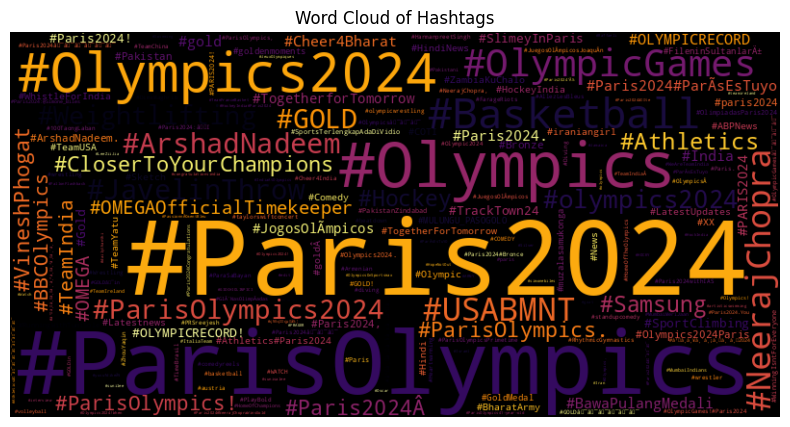

In [300]:
# Generate a word cloud for hashtags based on their frequency from the `hashtag_summary_df`
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='inferno').generate_from_frequencies(hashtag_summary_df.set_index('hashtag')['frequency'].to_dict())

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') # Remove colormap argument from here
plt.title('Word Cloud of Hashtags')
plt.axis('off')
plt.show()

## Observations

* The word cloud highlights "#Paris2024," "#ParisOlympics," and "#Olympics2024" as the most frequently used hashtags, emphasizing the focus on the Paris 2024 Olympic Games. Hashtags like "#NeerajChopra" and "#Basketball" also stand out, indicating key topics and athletes being discussed.